 # AIR QUALITY STATIONS COMPREHENSIVE ANALYSIS

In [15]:
from aq_edge.datautils.air_quality_analysis import (setup_plotting, load_station_data, show_data_overview, calculate_station_statistics, plot_time_series, plot_distributions, analyze_correlations, analyze_missing_data, analyze_outliers, generate_pdf_report, generate_executive_summary_pdf)

from datetime import datetime
now = datetime.now()
formatted = now.strftime("%Y%m%d_%H%M%S")

In [2]:
"""Main execution function"""
print("Analyzing data from stations: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC")


# Setup
setup_plotting()


[2025-08-26 21:07:55] INFO: [OK] Plotting configuration complete


Analyzing data from stations: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC


In [3]:
# Load data
station_data, combined_df = load_station_data(
        stations = ['APLAN', 'MHH', 'PFM', 'PGB', 'PLIB', 'USAM', 'UTEC'],
        data_dir = 'data/air/'
)

[2025-08-26 21:07:59] INFO: Loading station data...
[2025-08-26 21:07:59] INFO: [OK] Loaded APLAN: 6920 records
[2025-08-26 21:07:59] WARNING:   Removed 1 rows with invalid timestamps
[2025-08-26 21:07:59] INFO: [OK] Loaded MHH: 6620 records
[2025-08-26 21:07:59] INFO: [OK] Loaded PFM: 4911 records
[2025-08-26 21:07:59] INFO: [OK] Loaded PGB: 20474 records
[2025-08-26 21:07:59] INFO: [OK] Loaded PLIB: 19601 records
[2025-08-26 21:07:59] INFO: [OK] Loaded USAM: 33451 records
[2025-08-26 21:07:59] INFO: [OK] Loaded UTEC: 10085 records
[2025-08-26 21:07:59] INFO: 
[OK] Total combined records: 102062
[2025-08-26 21:07:59] INFO: [OK] Columns: ['Timestamp', 'ICA', 'Temp.', 'Hum.', 'CO2', 'VOC', 'Station']


In [4]:
combined_df

Timestamp  ICA  Temp.   Hum.    CO2    VOC Station
0      2025-05-03 15:08:00+00:00  1.0  31.06  46.89  517.0   82.0   APLAN
1      2025-05-03 15:19:00+00:00  1.0  31.64  45.87  531.0   90.0   APLAN
2      2025-05-03 15:29:00+00:00  1.0  30.76  47.29  562.0  112.0   APLAN
3      2025-05-03 15:59:00+00:00  1.0  31.26  46.16  531.0   90.0   APLAN
4      2025-05-03 16:09:00+00:00  2.0  33.33  42.90  615.0  143.0   APLAN
...                          ...  ...    ...    ...    ...    ...     ...
102057 2025-08-08 08:32:00+00:00  2.0  34.40  57.83  614.0  142.0    UTEC
102058 2025-08-08 08:42:00+00:00  2.0  35.14  55.14  622.0  149.0    UTEC
102059 2025-08-08 08:52:00+00:00  1.0  35.38  52.65  561.0  108.0    UTEC
102060 2025-08-08 09:03:00+00:00  2.0  35.72  50.87  537.0   93.0    UTEC
102061 2025-08-08 09:13:00+00:00  2.0  35.87  49.56  530.0   89.0    UTEC

[102062 rows x 7 columns]

In [5]:
 # Data overview
show_data_overview(combined_df)

[2025-08-26 21:08:04] INFO: 
[2025-08-26 21:08:04] INFO: DATA OVERVIEW
[2025-08-26 21:08:04] INFO: ============================================================
[2025-08-26 21:08:04] INFO: 
First few rows:
[2025-08-26 21:08:04] INFO:                   Timestamp  ICA  Temp.   Hum.    CO2    VOC Station
0 2025-05-03 15:08:00+00:00  1.0  31.06  46.89  517.0   82.0   APLAN
1 2025-05-03 15:19:00+00:00  1.0  31.64  45.87  531.0   90.0   APLAN
2 2025-05-03 15:29:00+00:00  1.0  30.76  47.29  562.0  112.0   APLAN
3 2025-05-03 15:59:00+00:00  1.0  31.26  46.16  531.0   90.0   APLAN
4 2025-05-03 16:09:00+00:00  2.0  33.33  42.90  615.0  143.0   APLAN
[2025-08-26 21:08:04] INFO: 
Data types:
[2025-08-26 21:08:04] INFO: Timestamp    datetime64[ns, UTC]
ICA                      float64
Temp.                    float64
Hum.                     float64
CO2                      float64
VOC                      float64
Station                   object
dtype: object
[2025-08-26 21:08:04] INFO: 
Basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102062 entries, 0 to 102061
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   Timestamp  102062 non-null  datetime64[ns, UTC]
 1   ICA        102062 non-null  float64            
 2   Temp.      102062 non-null  float64            
 3   Hum.       102062 non-null  float64            
 4   CO2        102062 non-null  float64            
 5   VOC        102062 non-null  float64            
 6   Station    102062 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 5.5+ MB


In [6]:
# Statistical analysis
calculate_station_statistics(station_data)

[2025-08-26 21:08:14] INFO: 
[2025-08-26 21:08:14] INFO: SUMMARY STATISTICS PER STATION
[2025-08-26 21:08:14] INFO: ============================================================
[2025-08-26 21:08:14] INFO: 
[2025-08-26 21:08:14] INFO: STATION: APLAN
[2025-08-26 21:08:14] INFO: ==================================================
[2025-08-26 21:08:14] INFO: Total records: 6920
[2025-08-26 21:08:14] INFO: Date range: 2025-05-03 15:08:00+00:00 to 2025-08-22 13:42:00+00:00
[2025-08-26 21:08:14] INFO: 
--- Temp. ---
[2025-08-26 21:08:14] INFO: Missing values: 0 (0.00%)
[2025-08-26 21:08:14] INFO: Mean: 27.36
[2025-08-26 21:08:14] INFO: Std: 5.76
[2025-08-26 21:08:14] INFO: Min: 15.27
[2025-08-26 21:08:14] INFO: Max: 46.97
[2025-08-26 21:08:14] INFO: Outliers (IQR method): 10 (0.14%)
[2025-08-26 21:08:14] INFO: Q1: 23.26, Q3: 32.17
[2025-08-26 21:08:14] INFO: 
--- Hum. ---
[2025-08-26 21:08:14] INFO: Missing values: 0 (0.00%)
[2025-08-26 21:08:14] INFO: Mean: 67.92
[2025-08-26 21:08:14] INFO: S

[2025-08-26 21:08:19] INFO: 
[2025-08-26 21:08:19] INFO: GENERATING TIME SERIES PLOTS
[2025-08-26 21:08:19] INFO: ============================================================


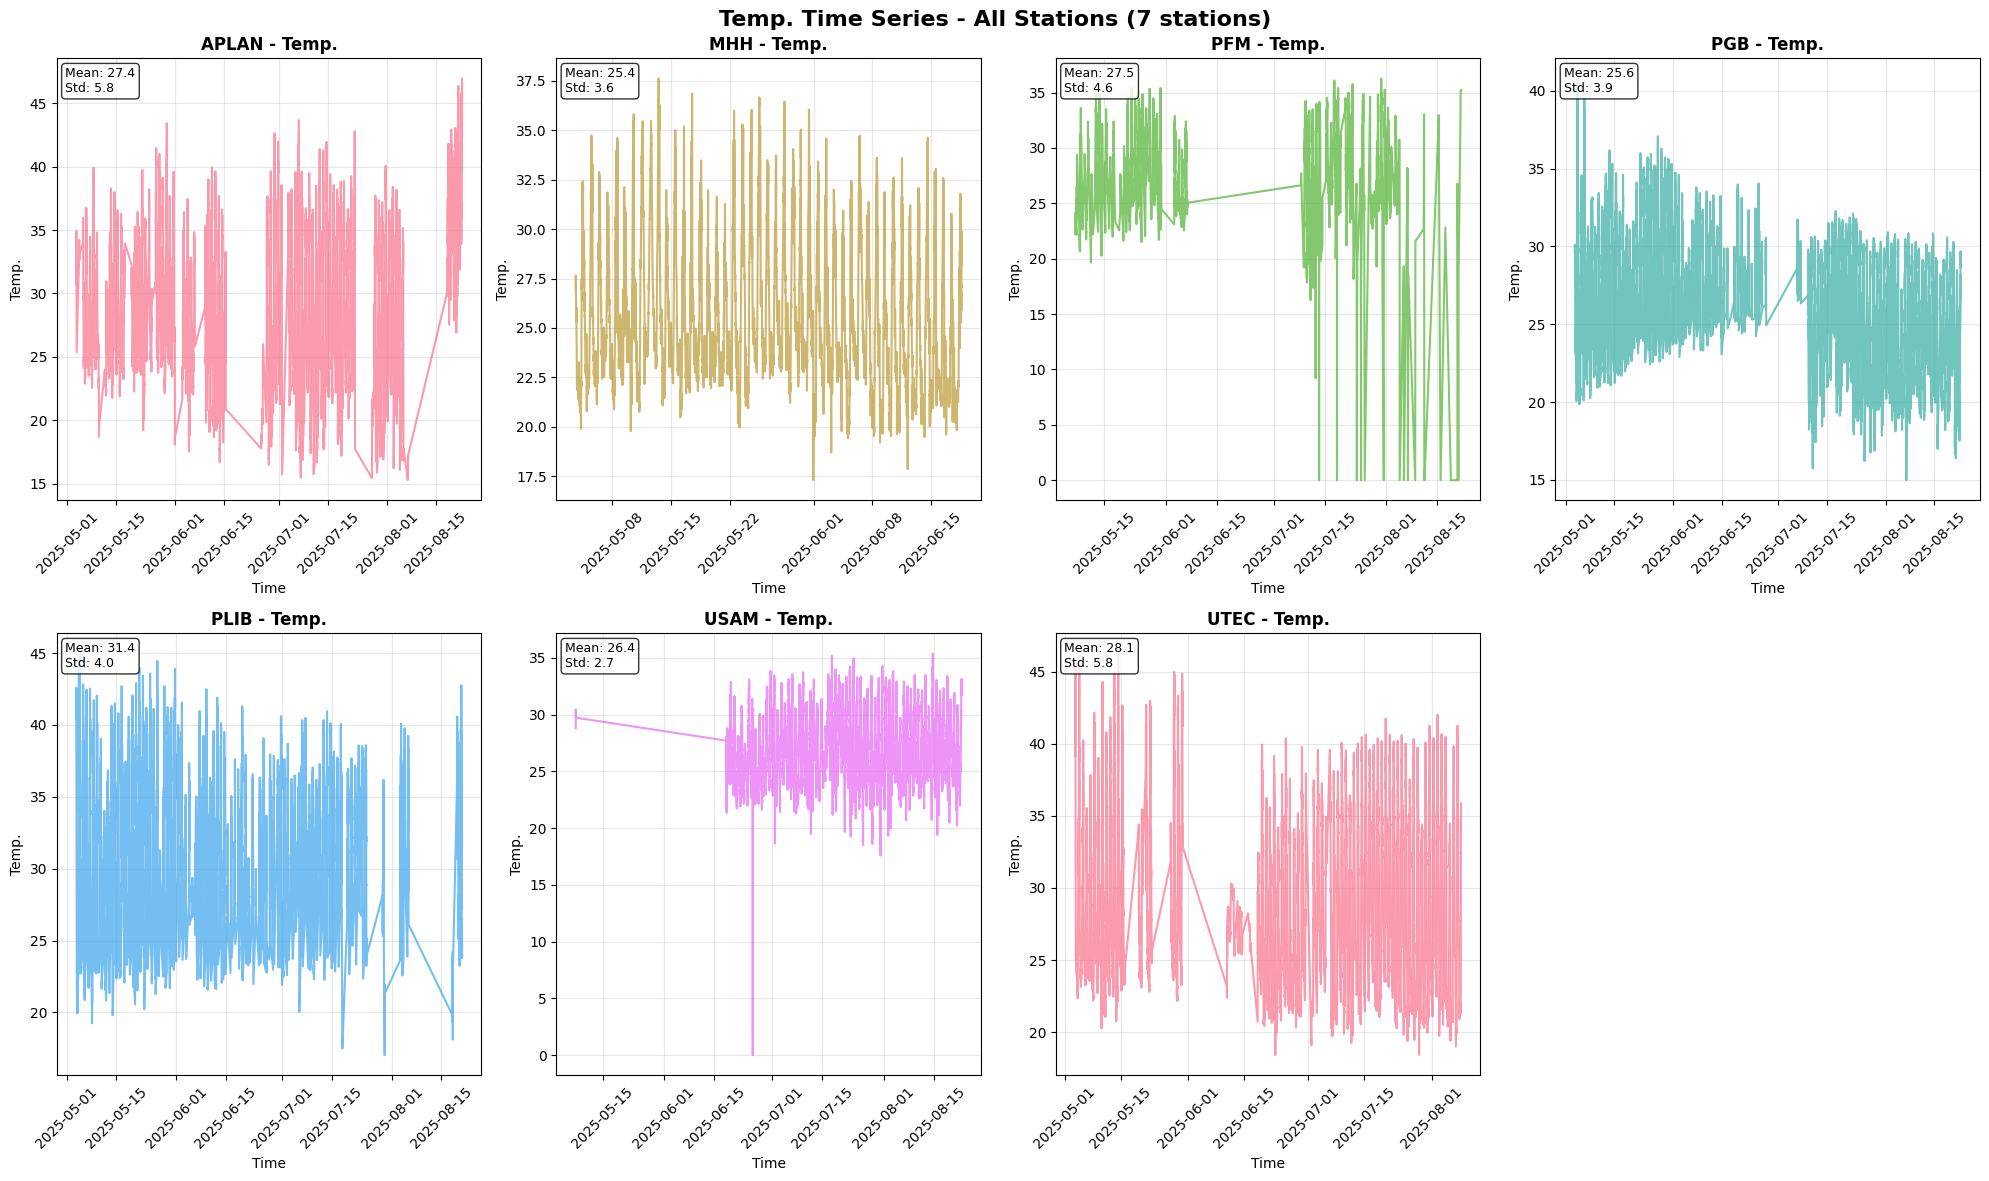

[2025-08-26 21:08:24] INFO: [OK] Generated time series subplots for Temp. (7 stations)


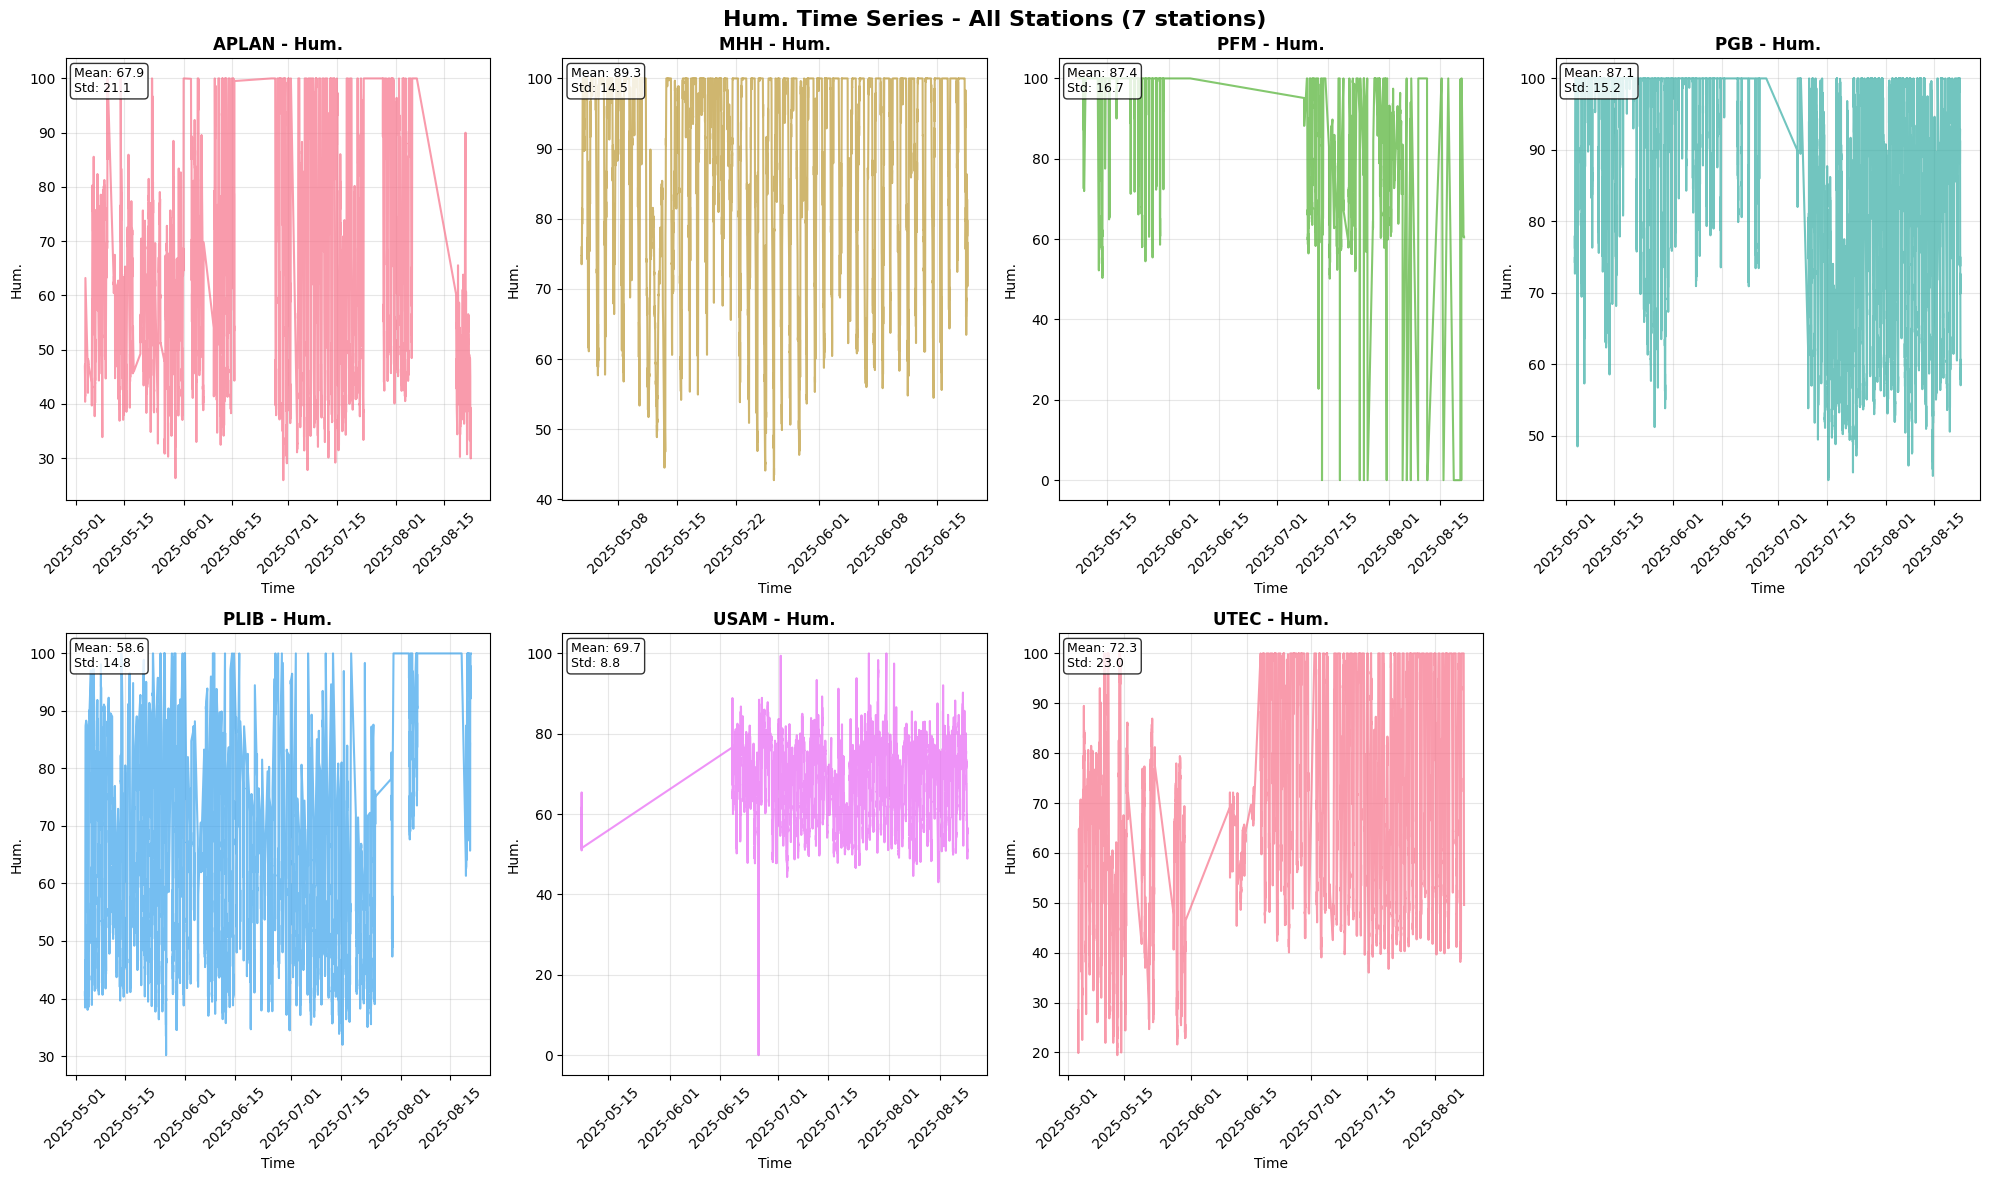

[2025-08-26 21:08:28] INFO: [OK] Generated time series subplots for Hum. (7 stations)


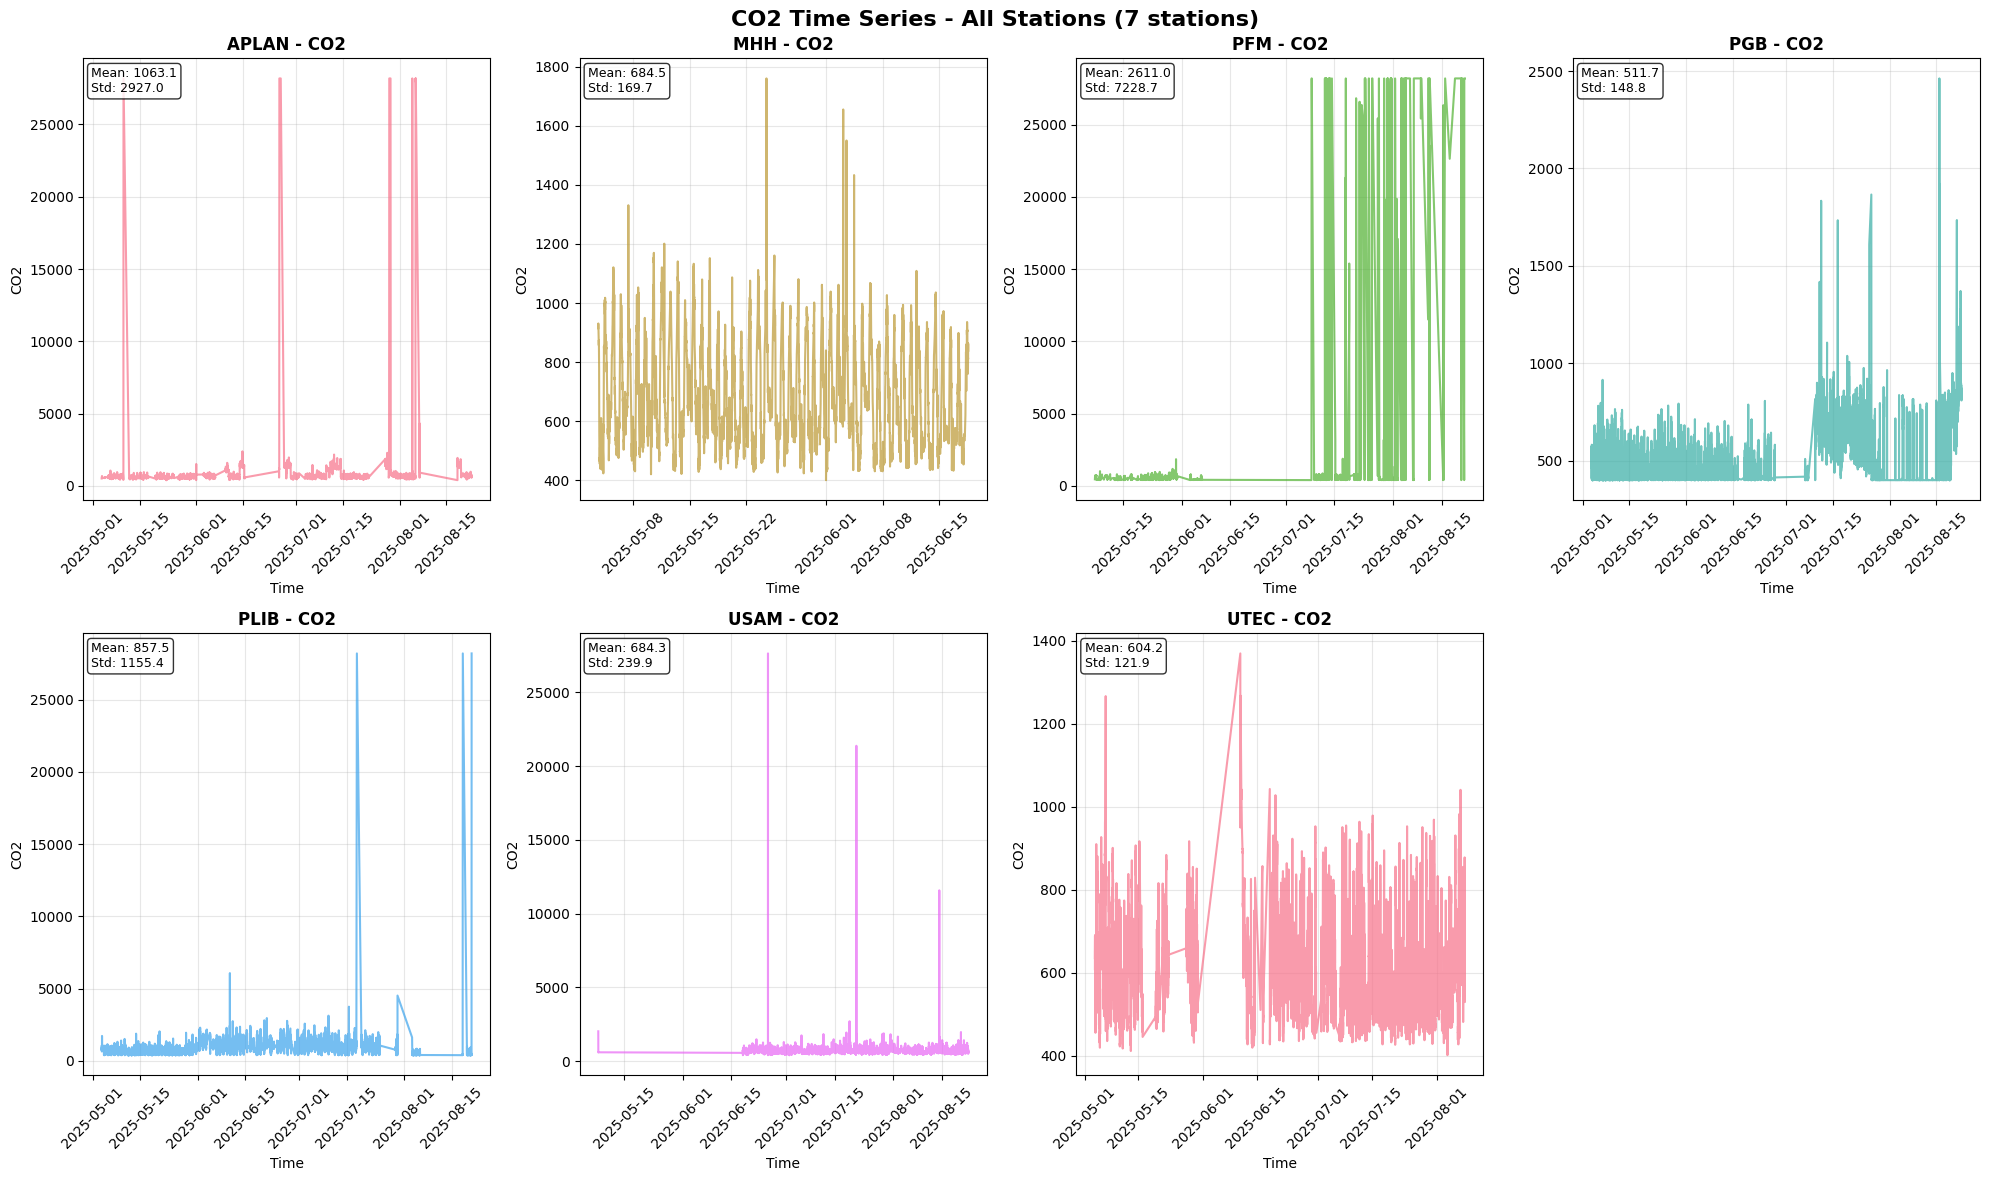

[2025-08-26 21:08:31] INFO: [OK] Generated time series subplots for CO2 (7 stations)


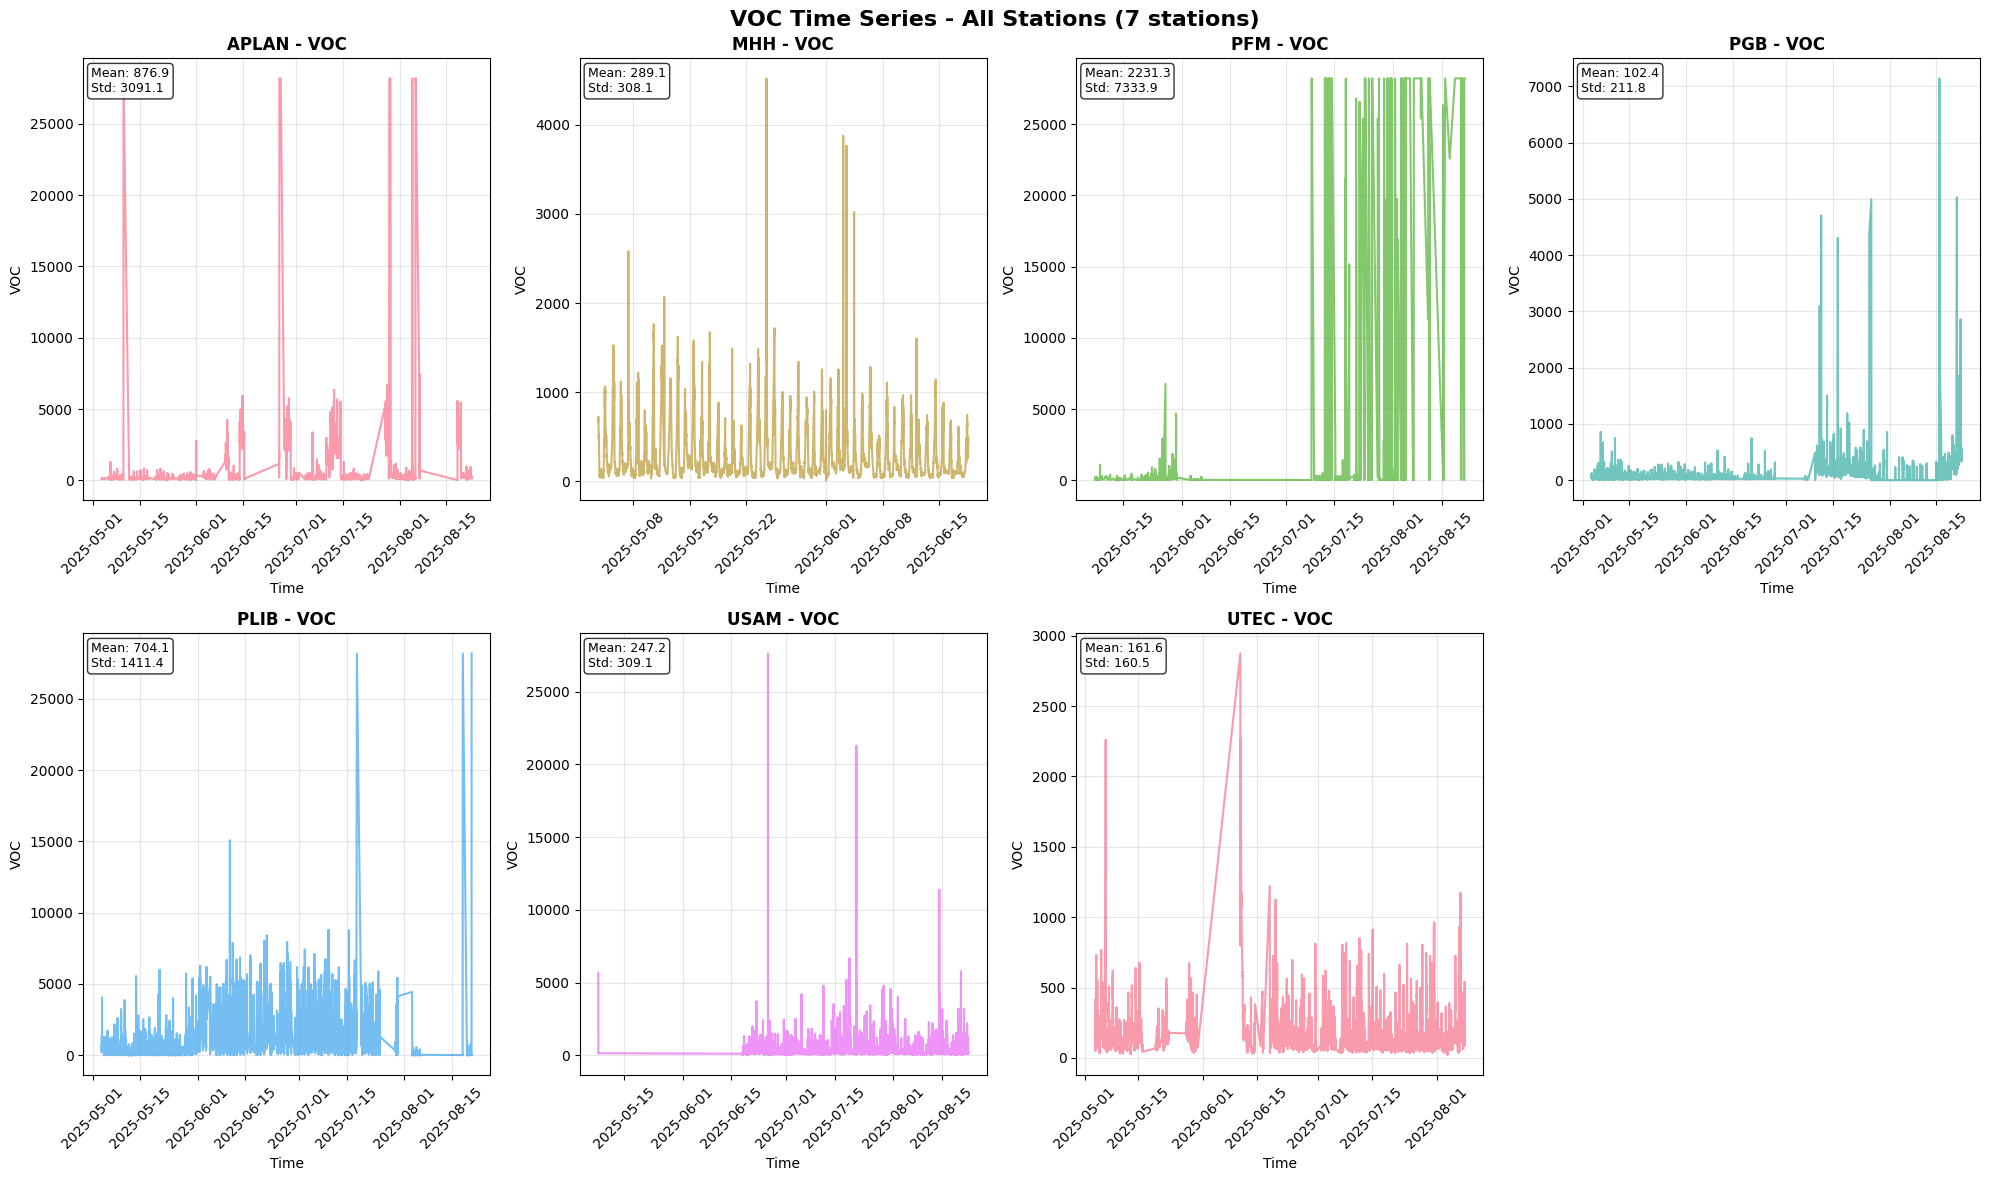

[2025-08-26 21:08:34] INFO: [OK] Generated time series subplots for VOC (7 stations)


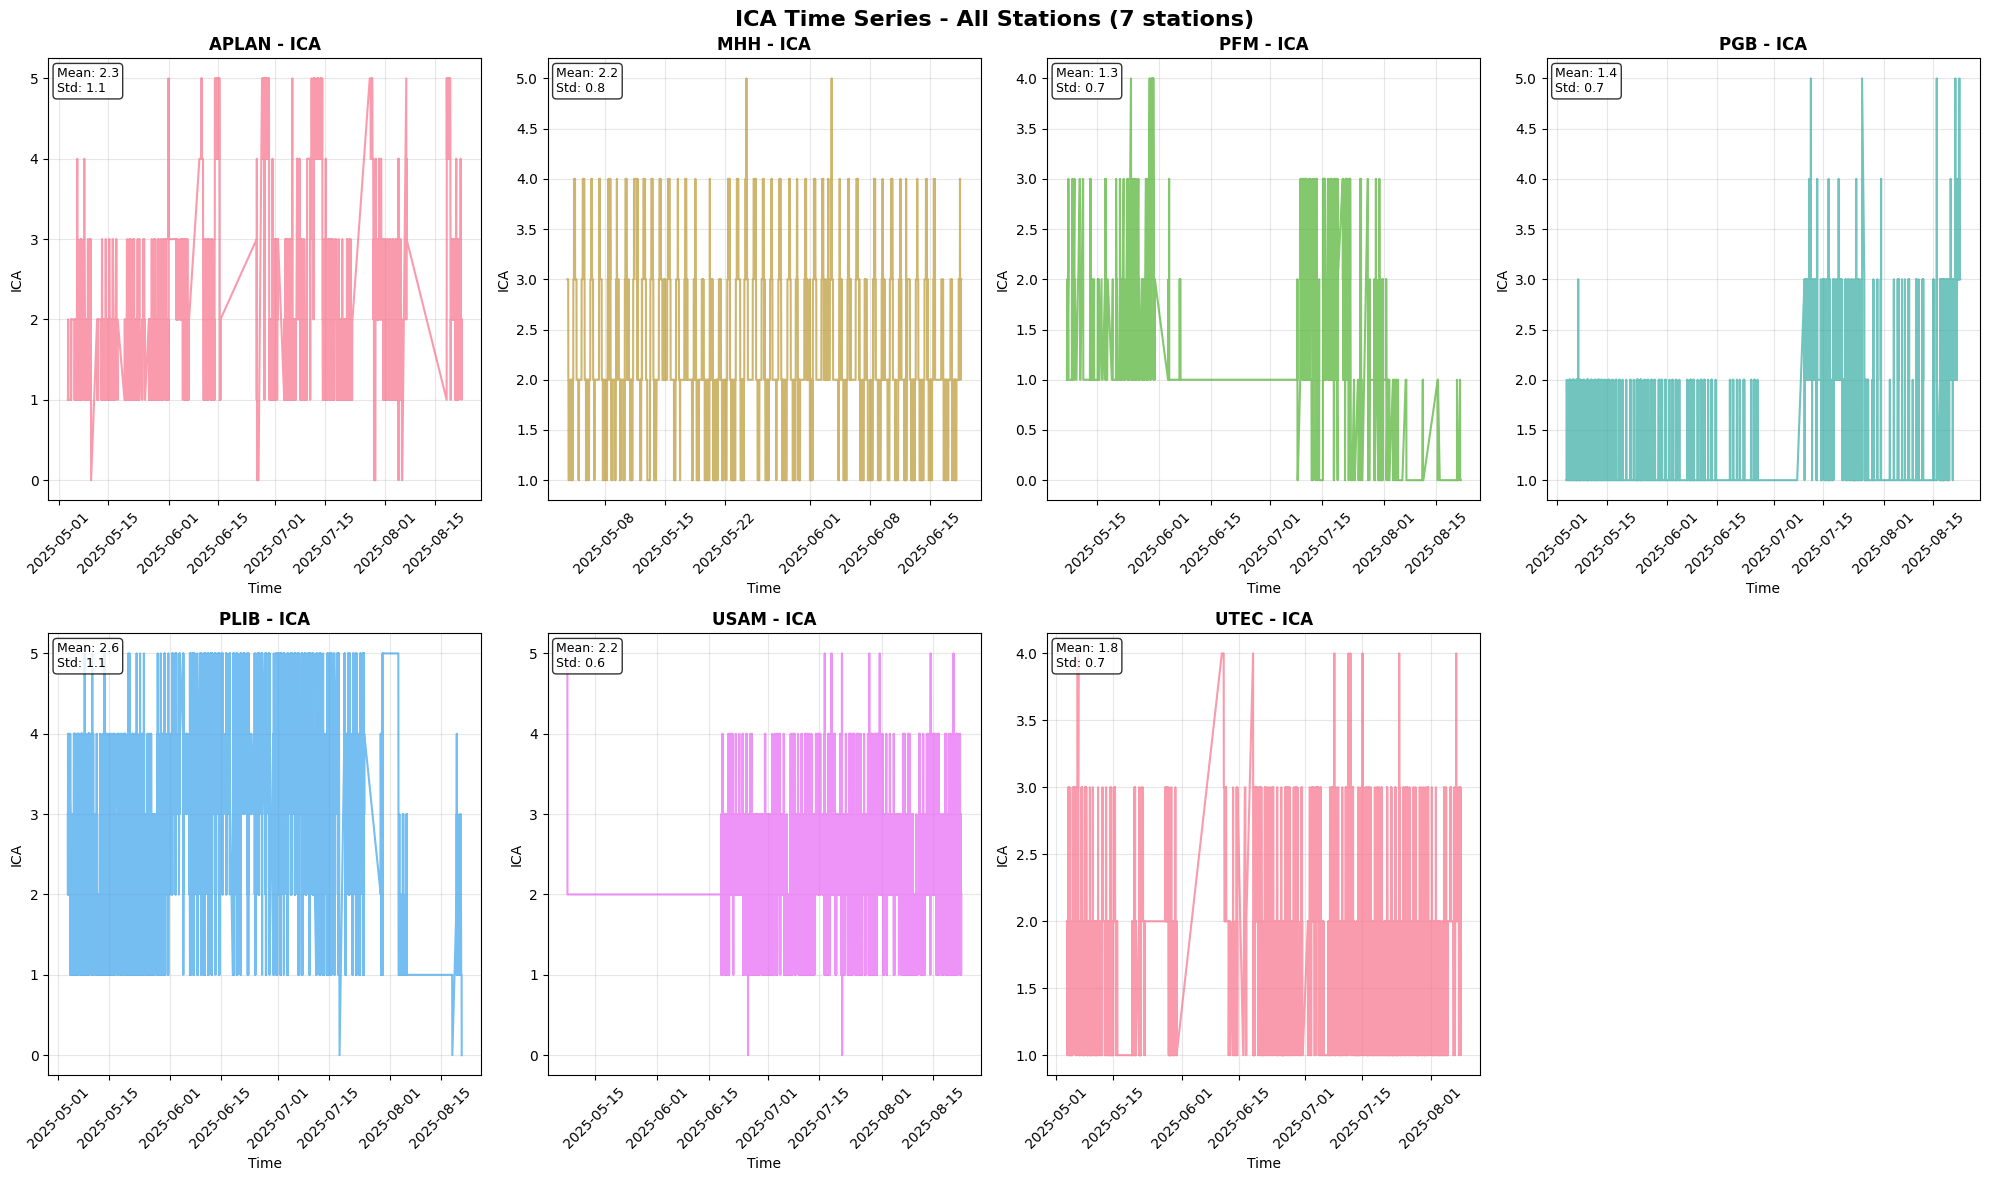

[2025-08-26 21:08:38] INFO: [OK] Generated time series subplots for ICA (7 stations)
[2025-08-26 21:08:38] INFO: 
Generating overview plots per station...


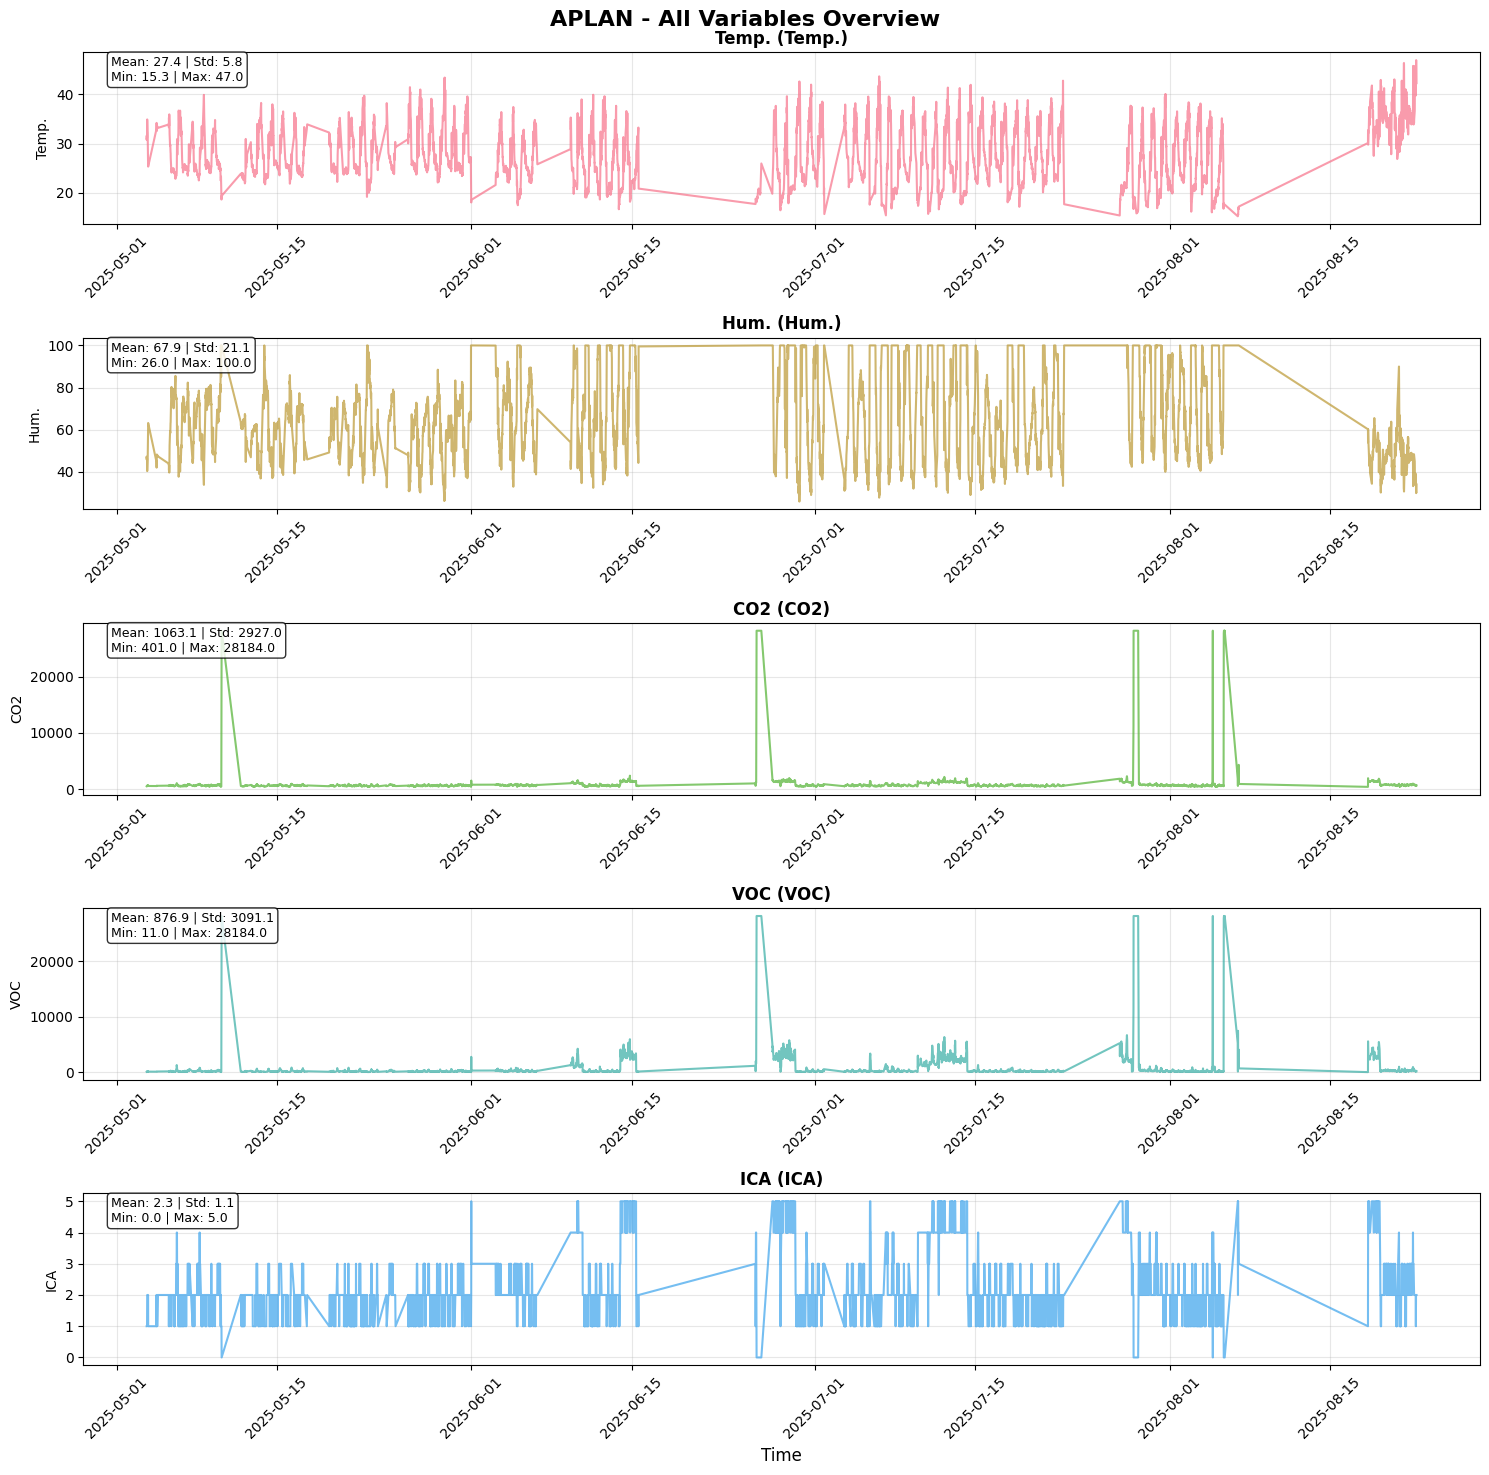

[2025-08-26 21:08:40] INFO: [OK] Generated overview plot for APLAN


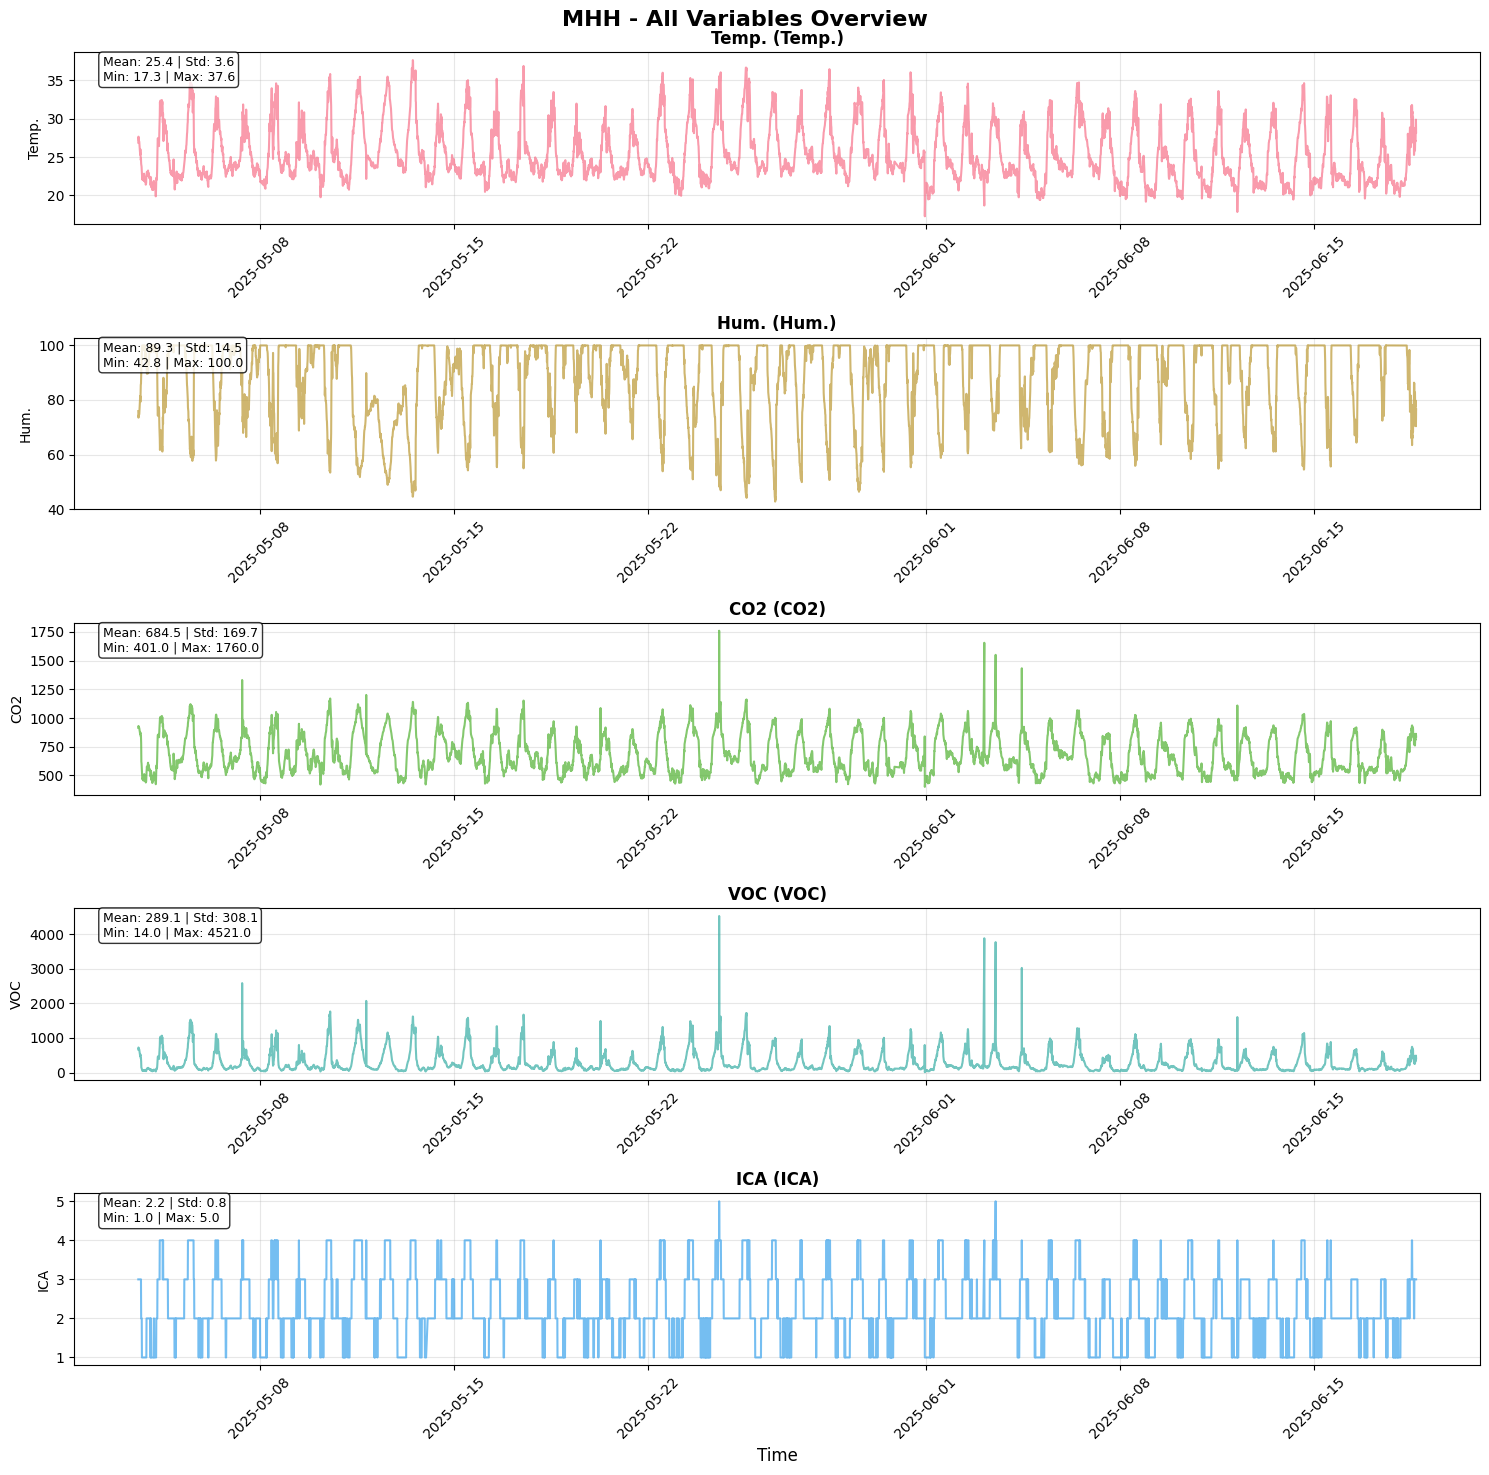

[2025-08-26 21:08:42] INFO: [OK] Generated overview plot for MHH


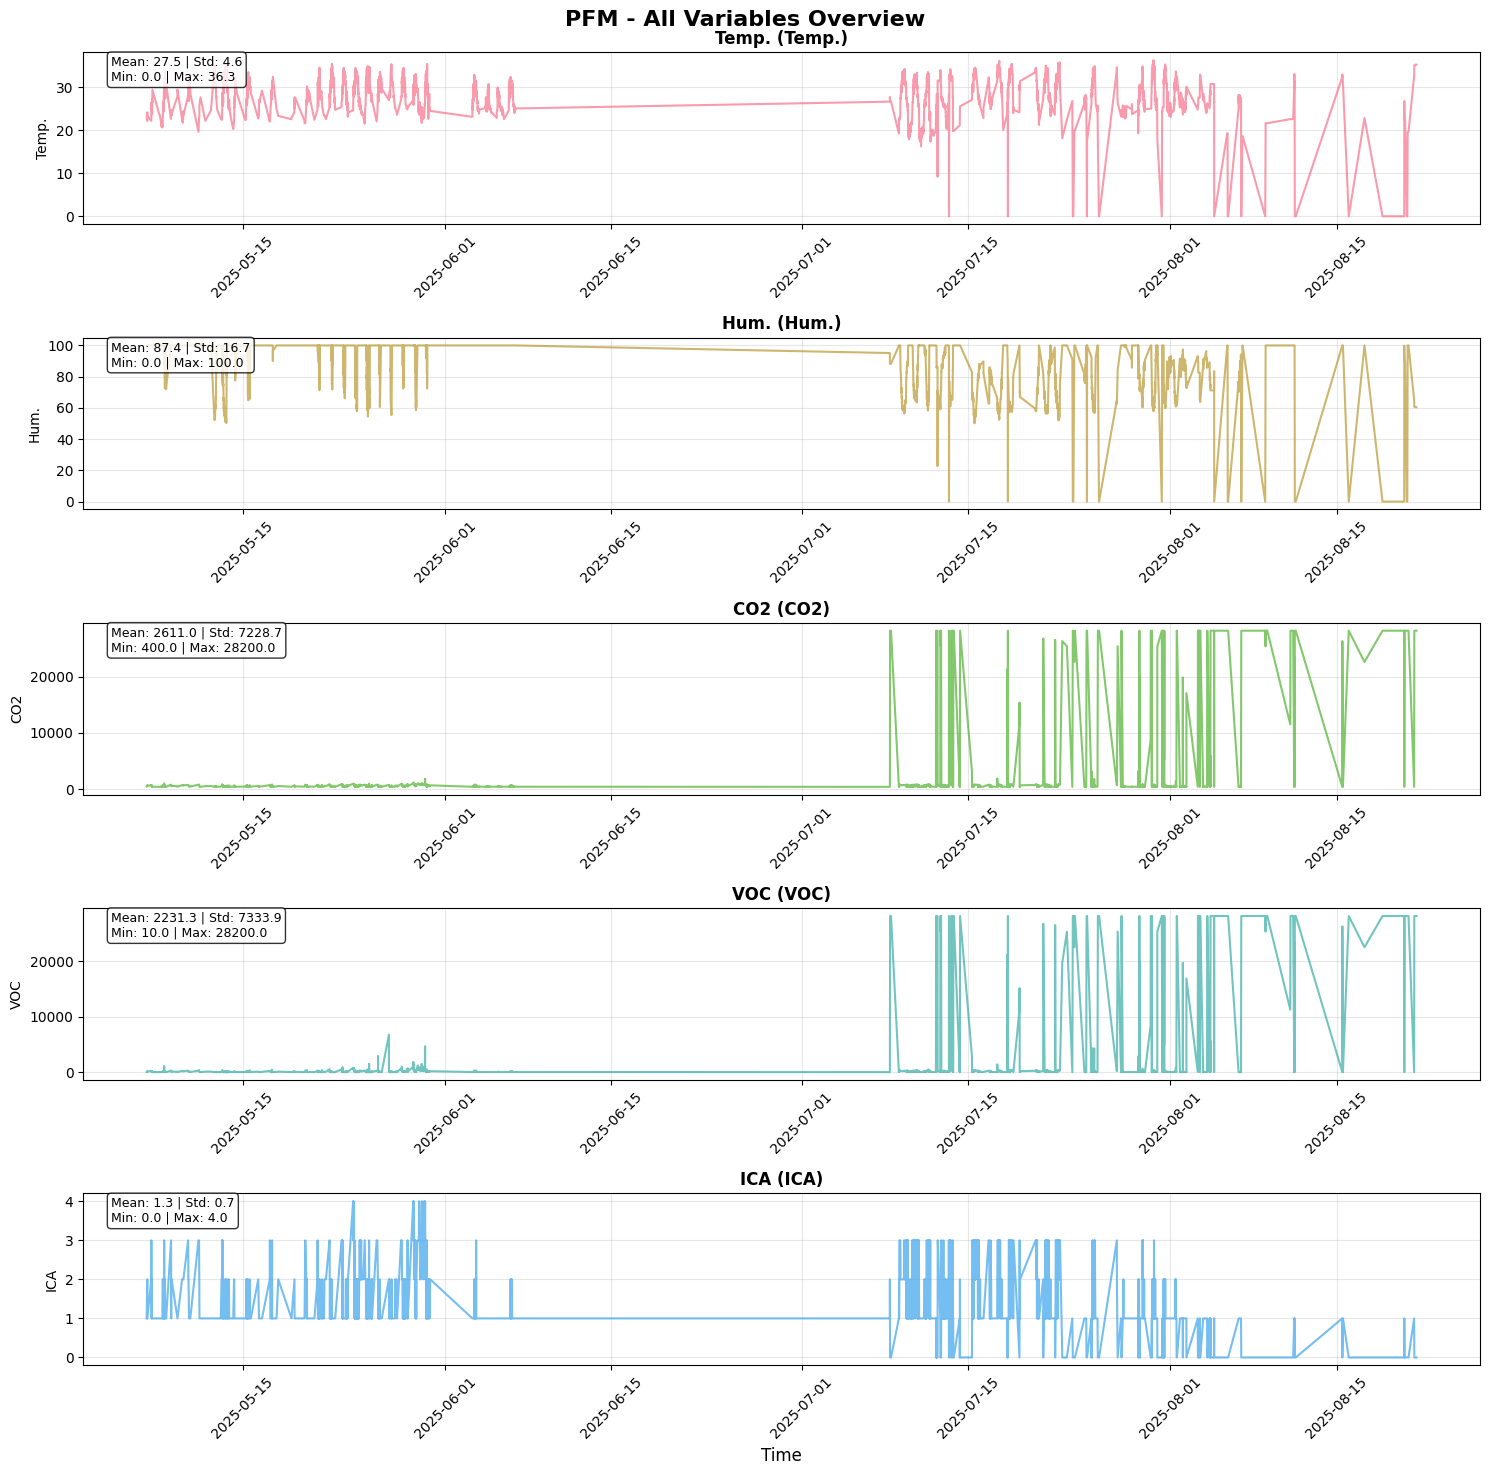

[2025-08-26 21:08:44] INFO: [OK] Generated overview plot for PFM


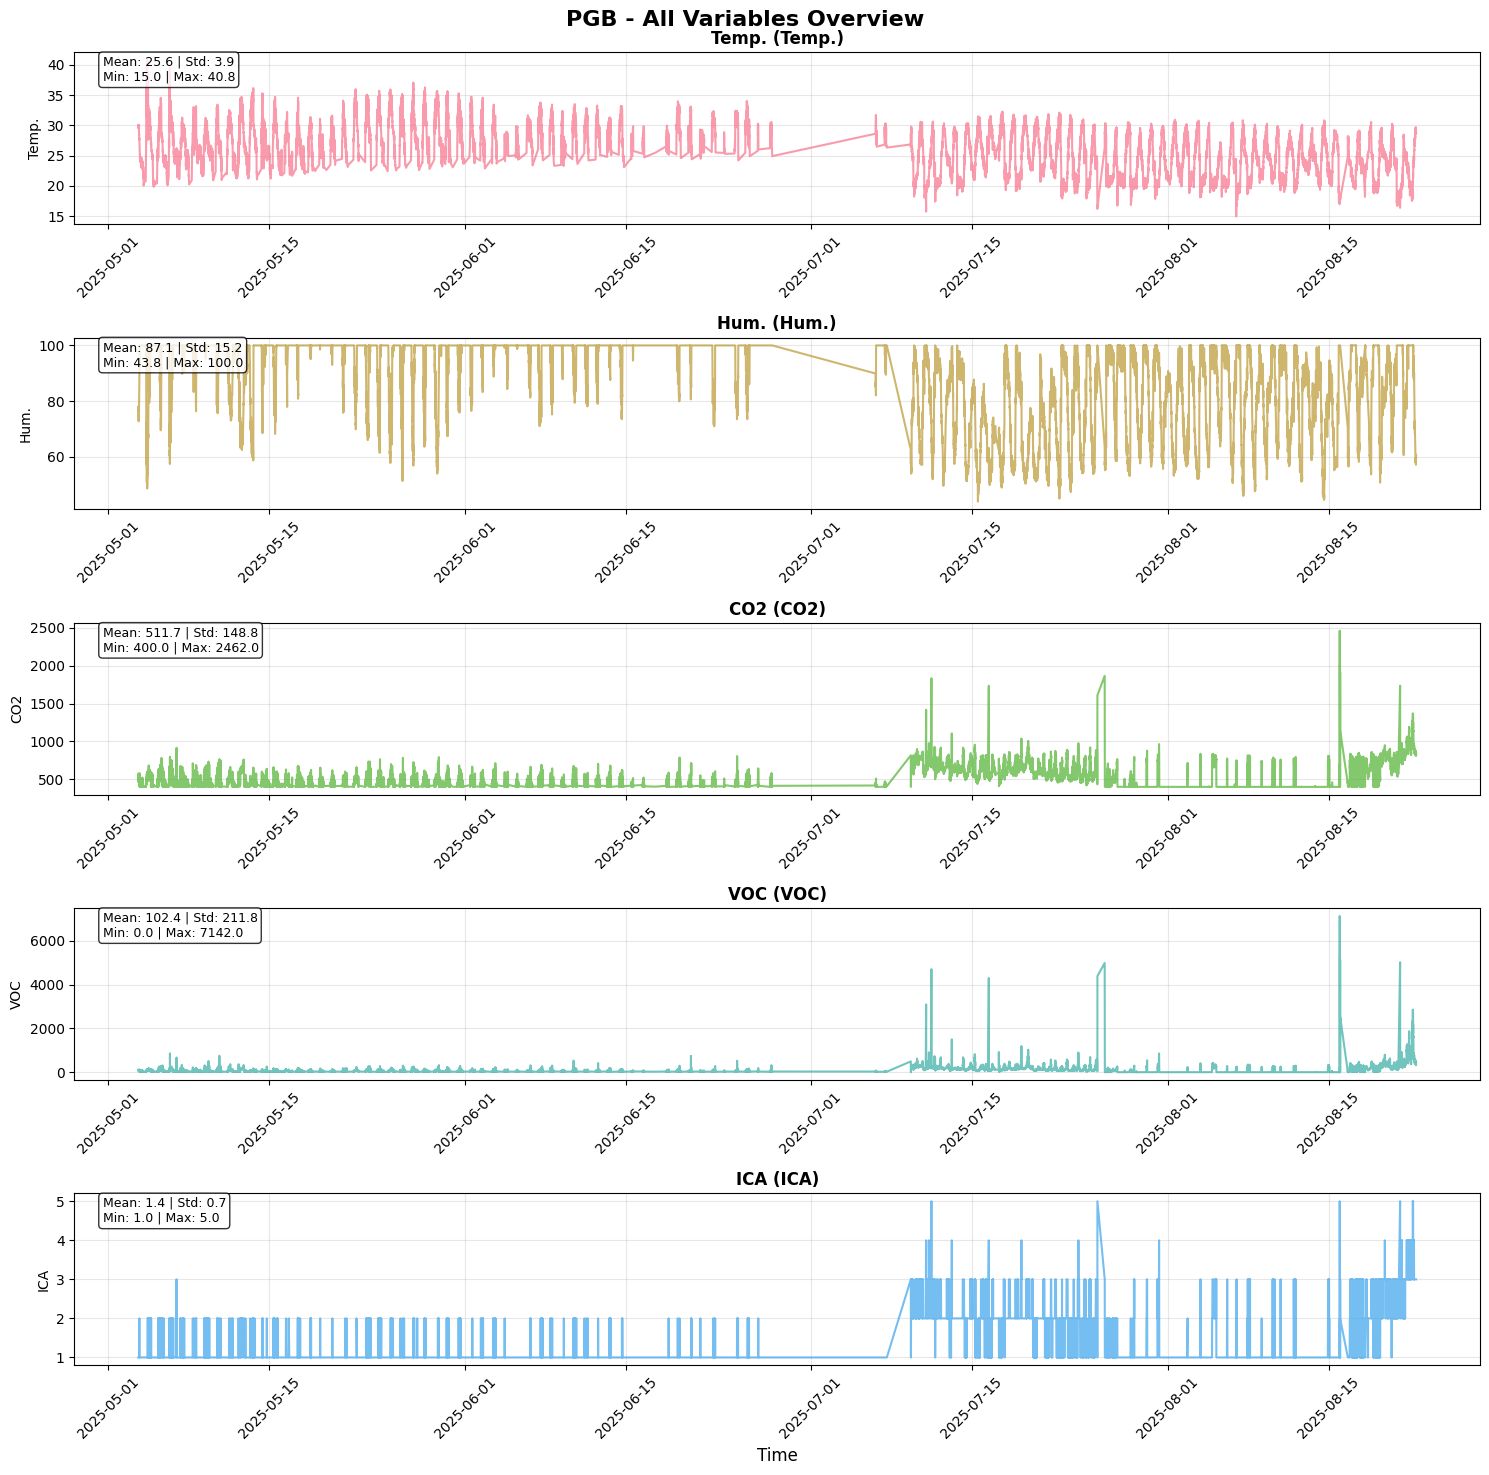

[2025-08-26 21:08:47] INFO: [OK] Generated overview plot for PGB


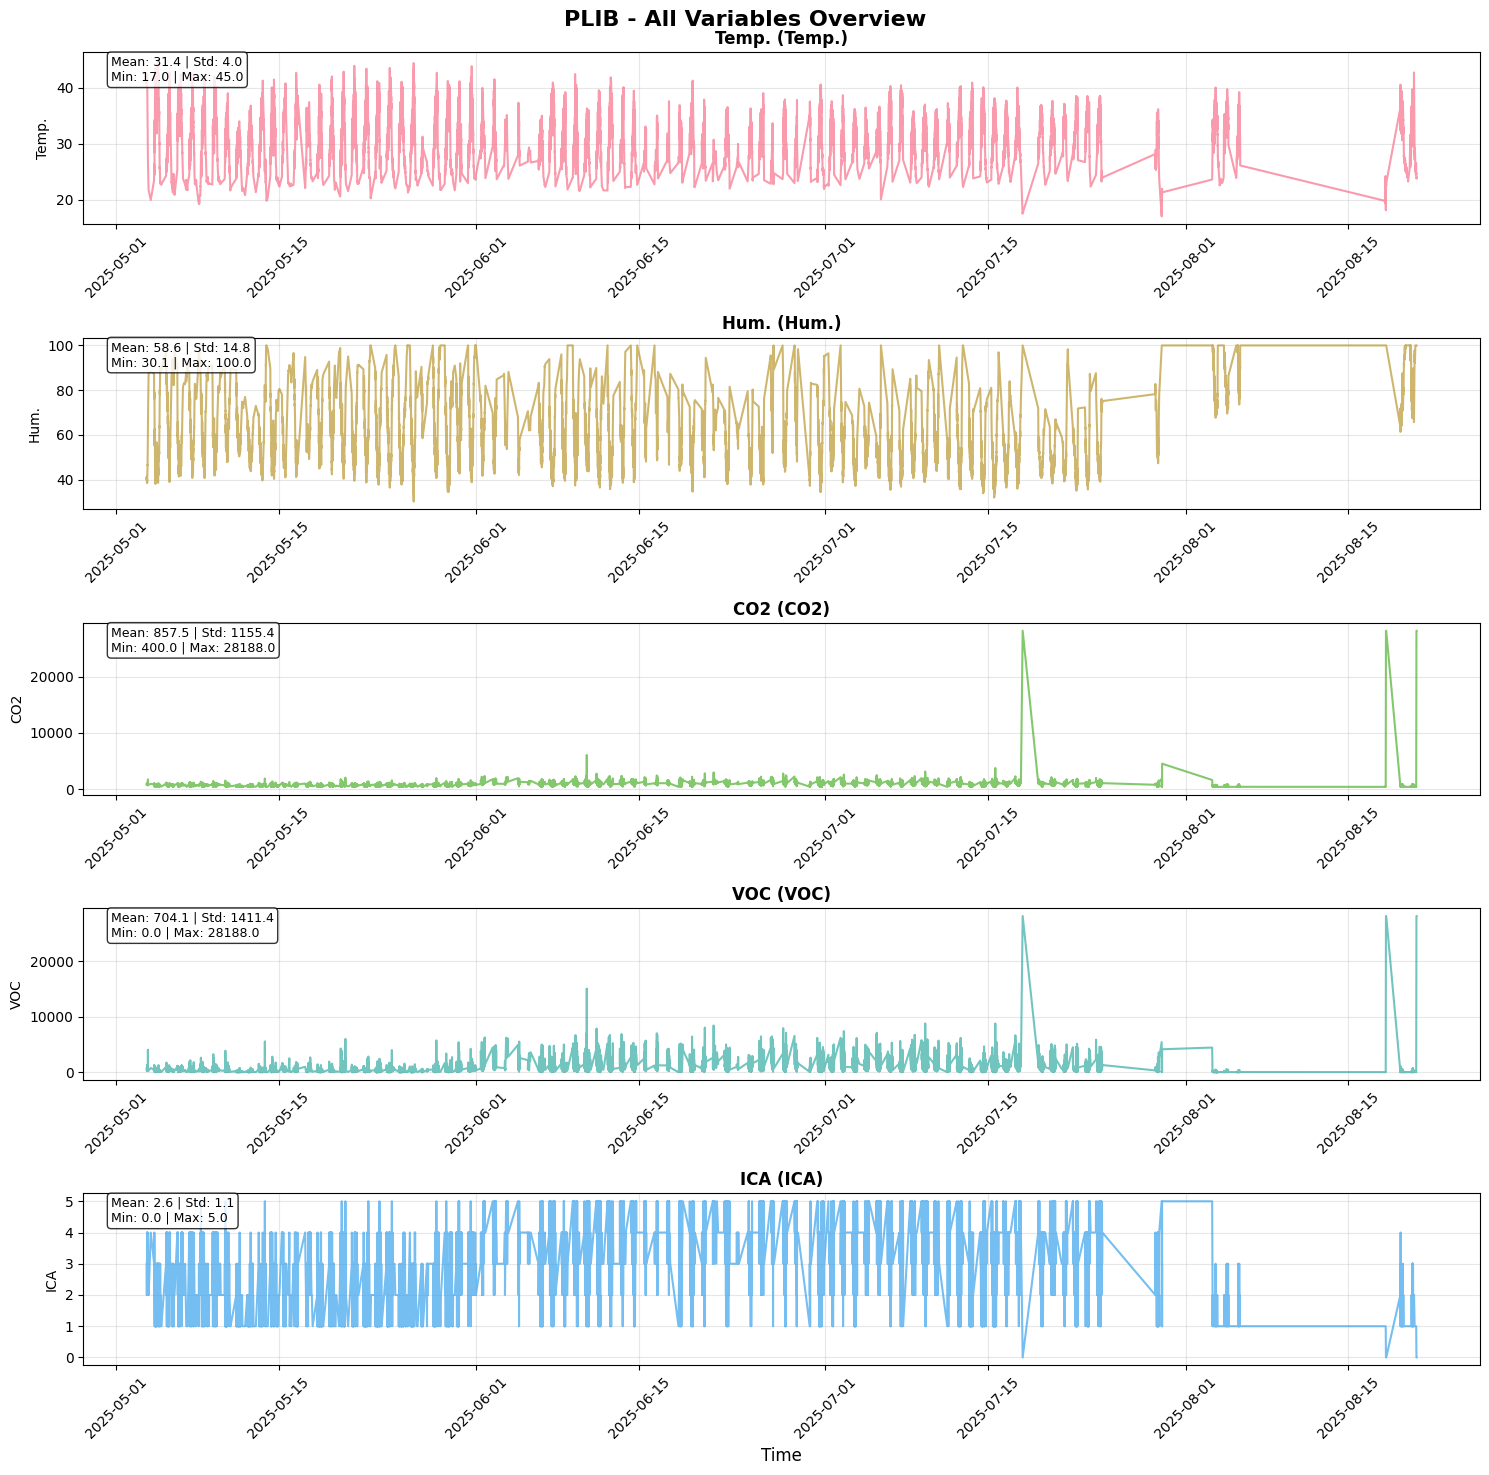

[2025-08-26 21:08:50] INFO: [OK] Generated overview plot for PLIB


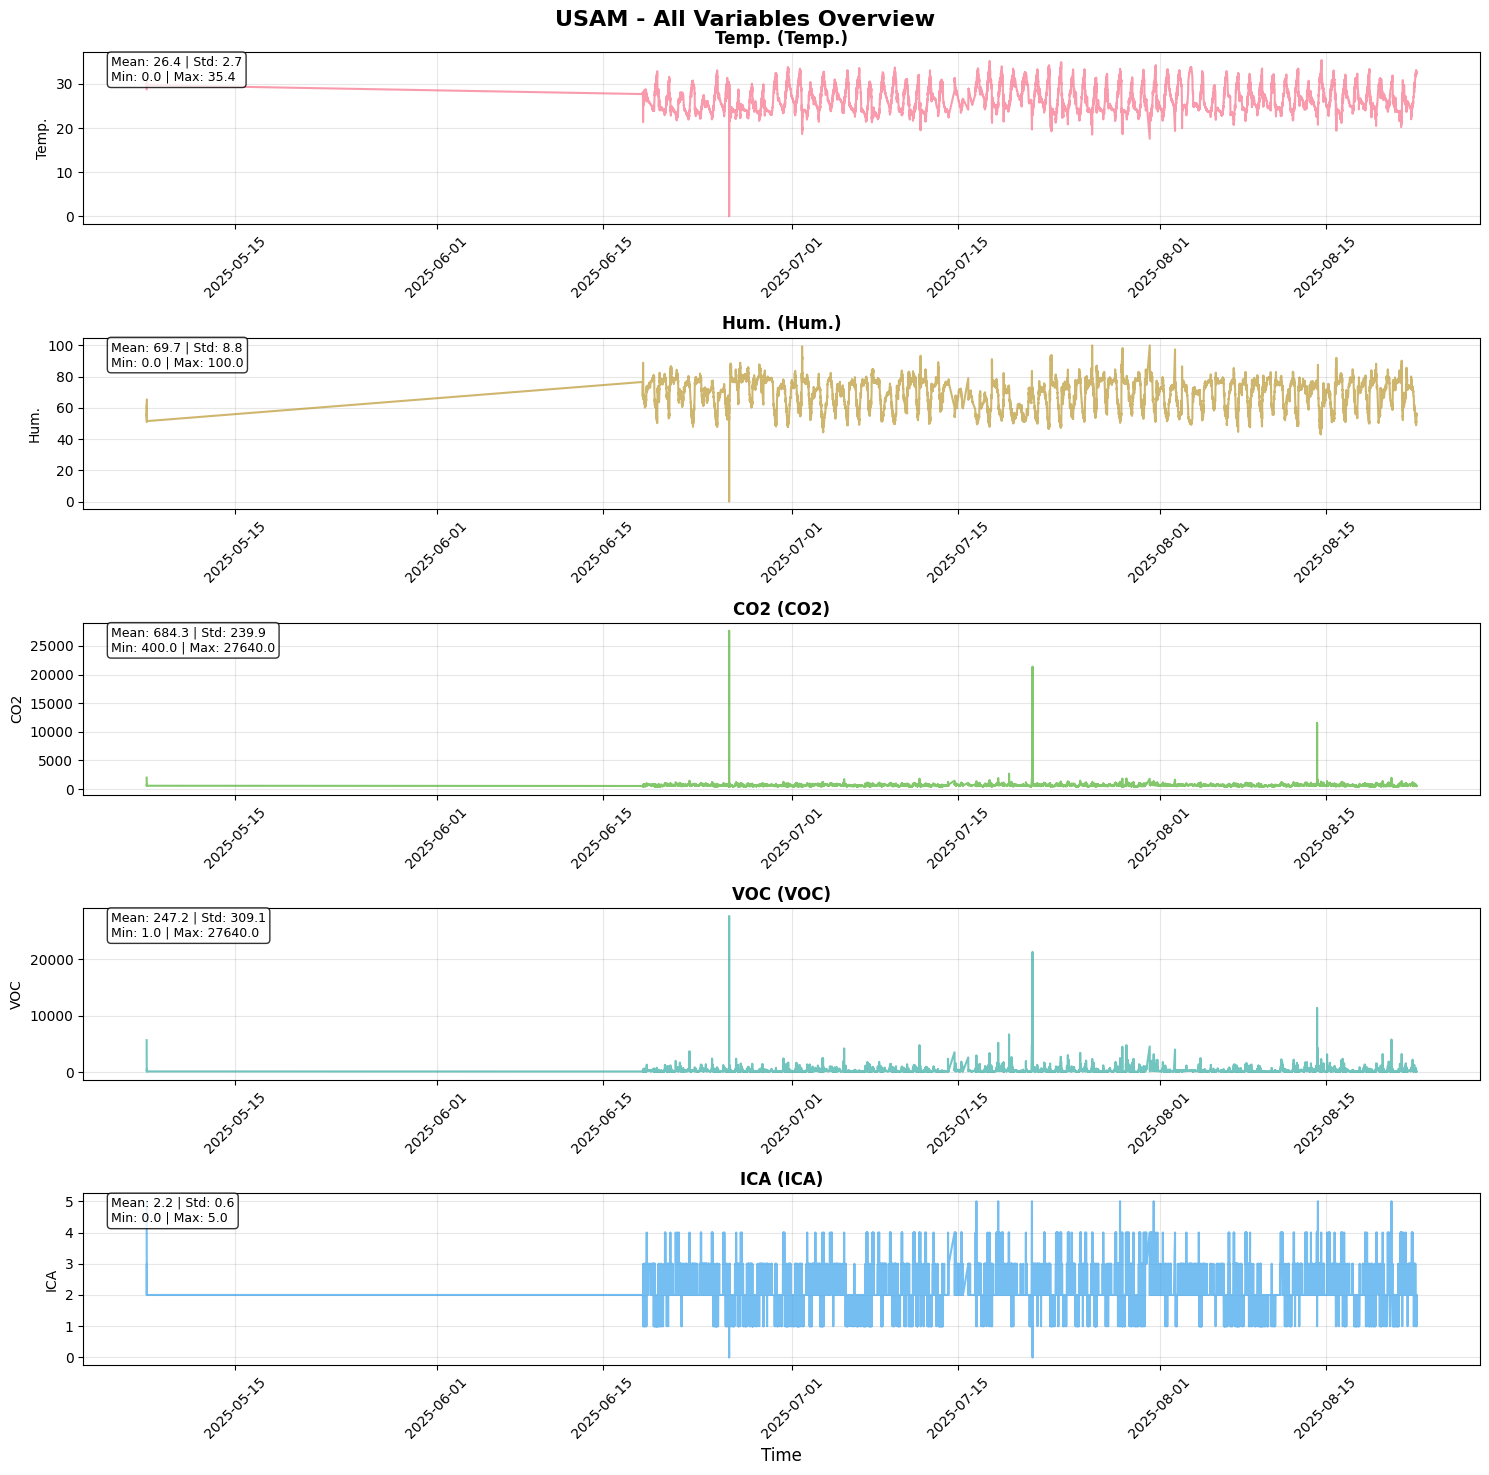

[2025-08-26 21:08:54] INFO: [OK] Generated overview plot for USAM


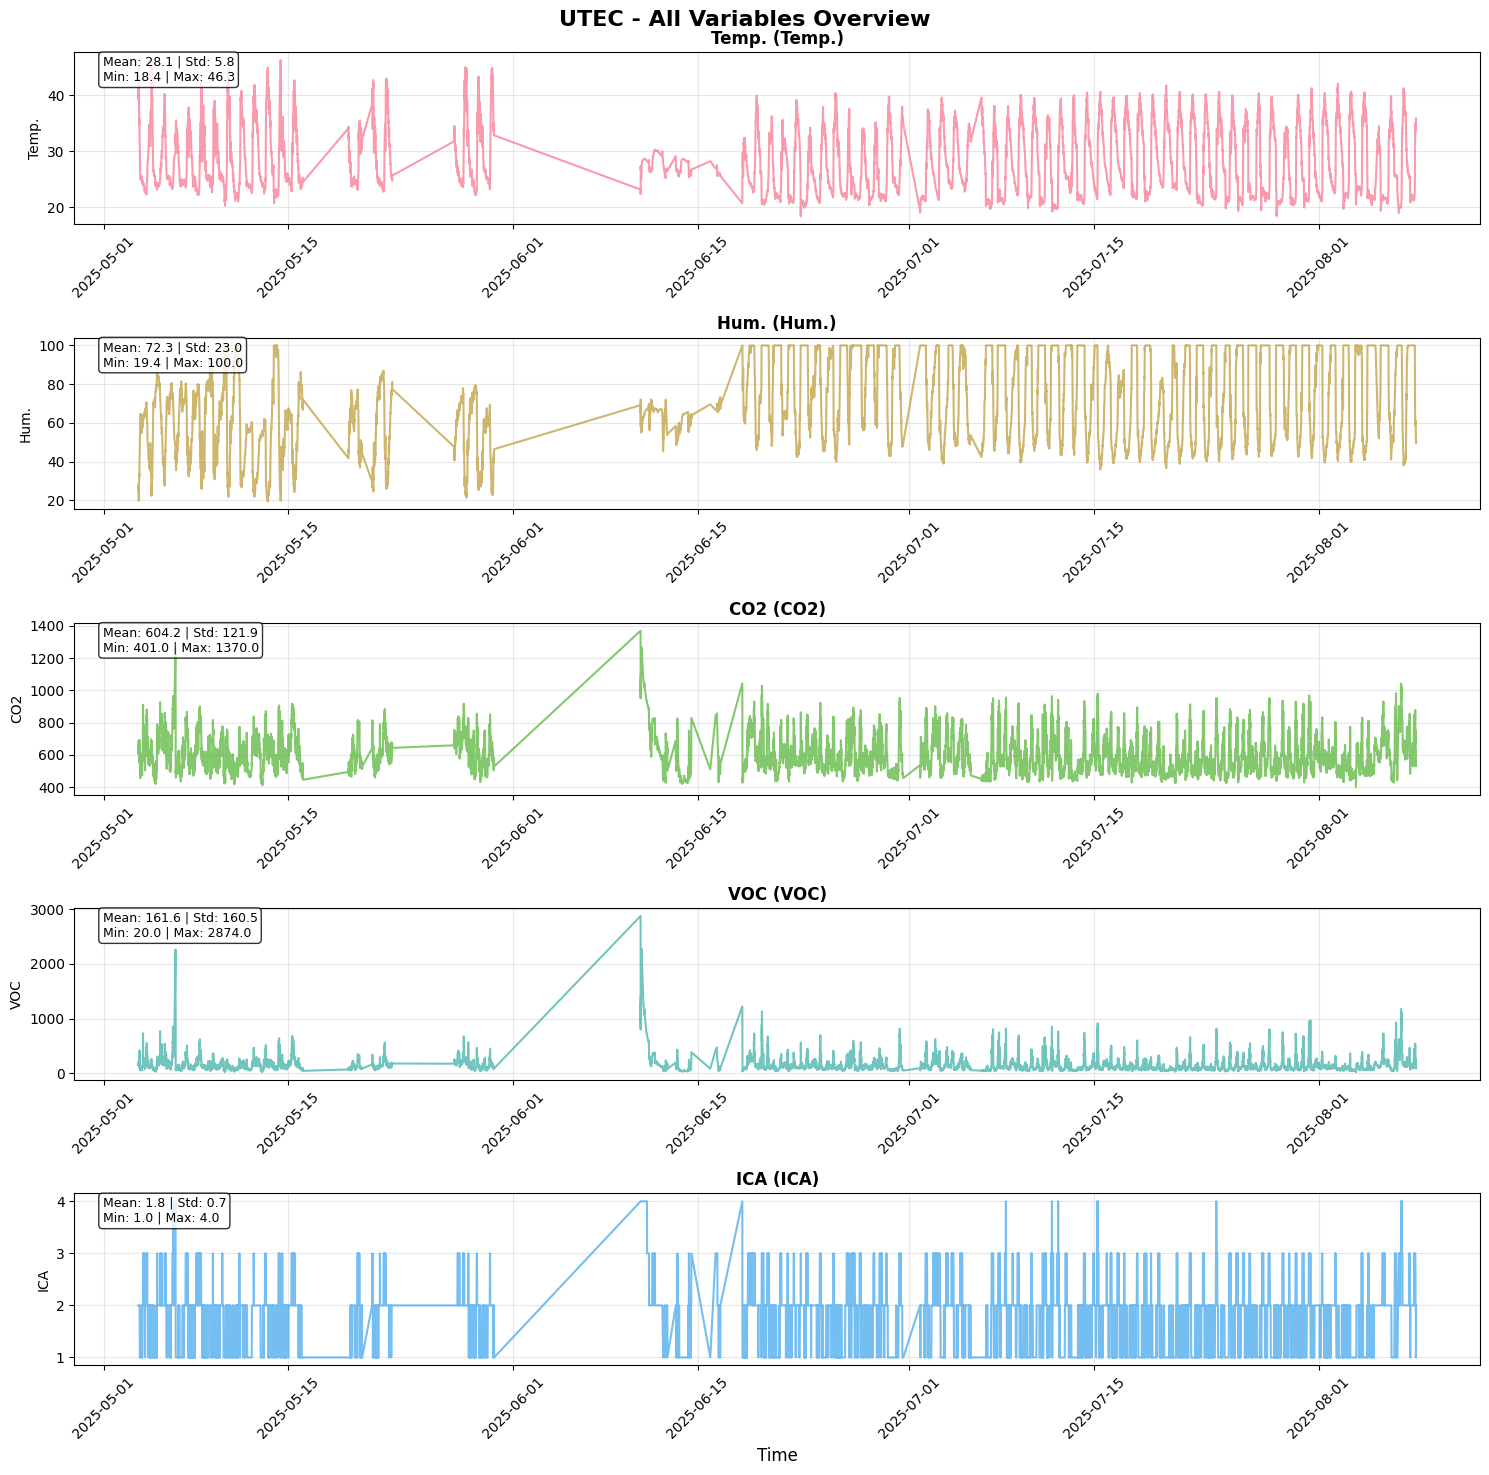

[2025-08-26 21:08:55] INFO: [OK] Generated overview plot for UTEC


In [7]:
# Visualizations
plot_time_series(station_data)

[2025-08-26 21:09:03] INFO: 
[2025-08-26 21:09:03] INFO: GENERATING DISTRIBUTION PLOTS
[2025-08-26 21:09:03] INFO: ============================================================


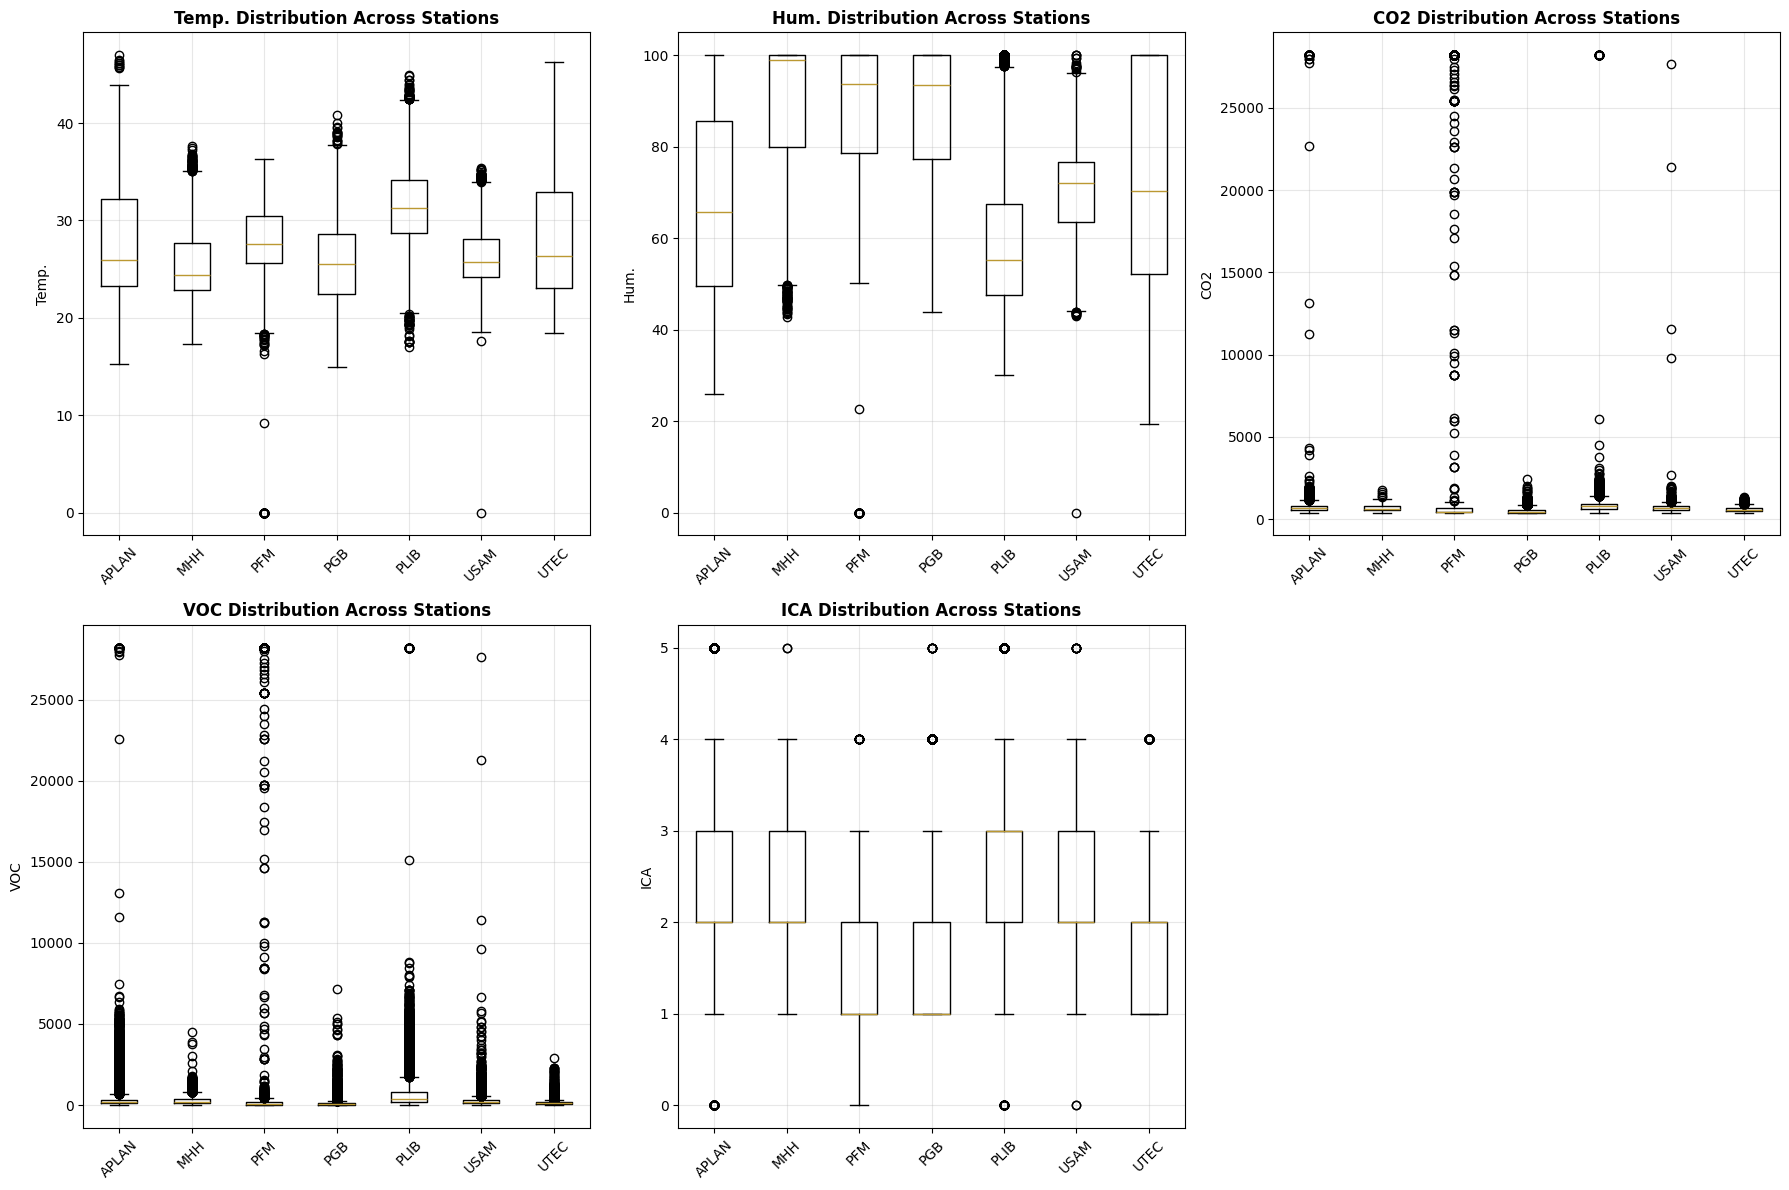

[2025-08-26 21:09:04] INFO: [OK] Generated box plots


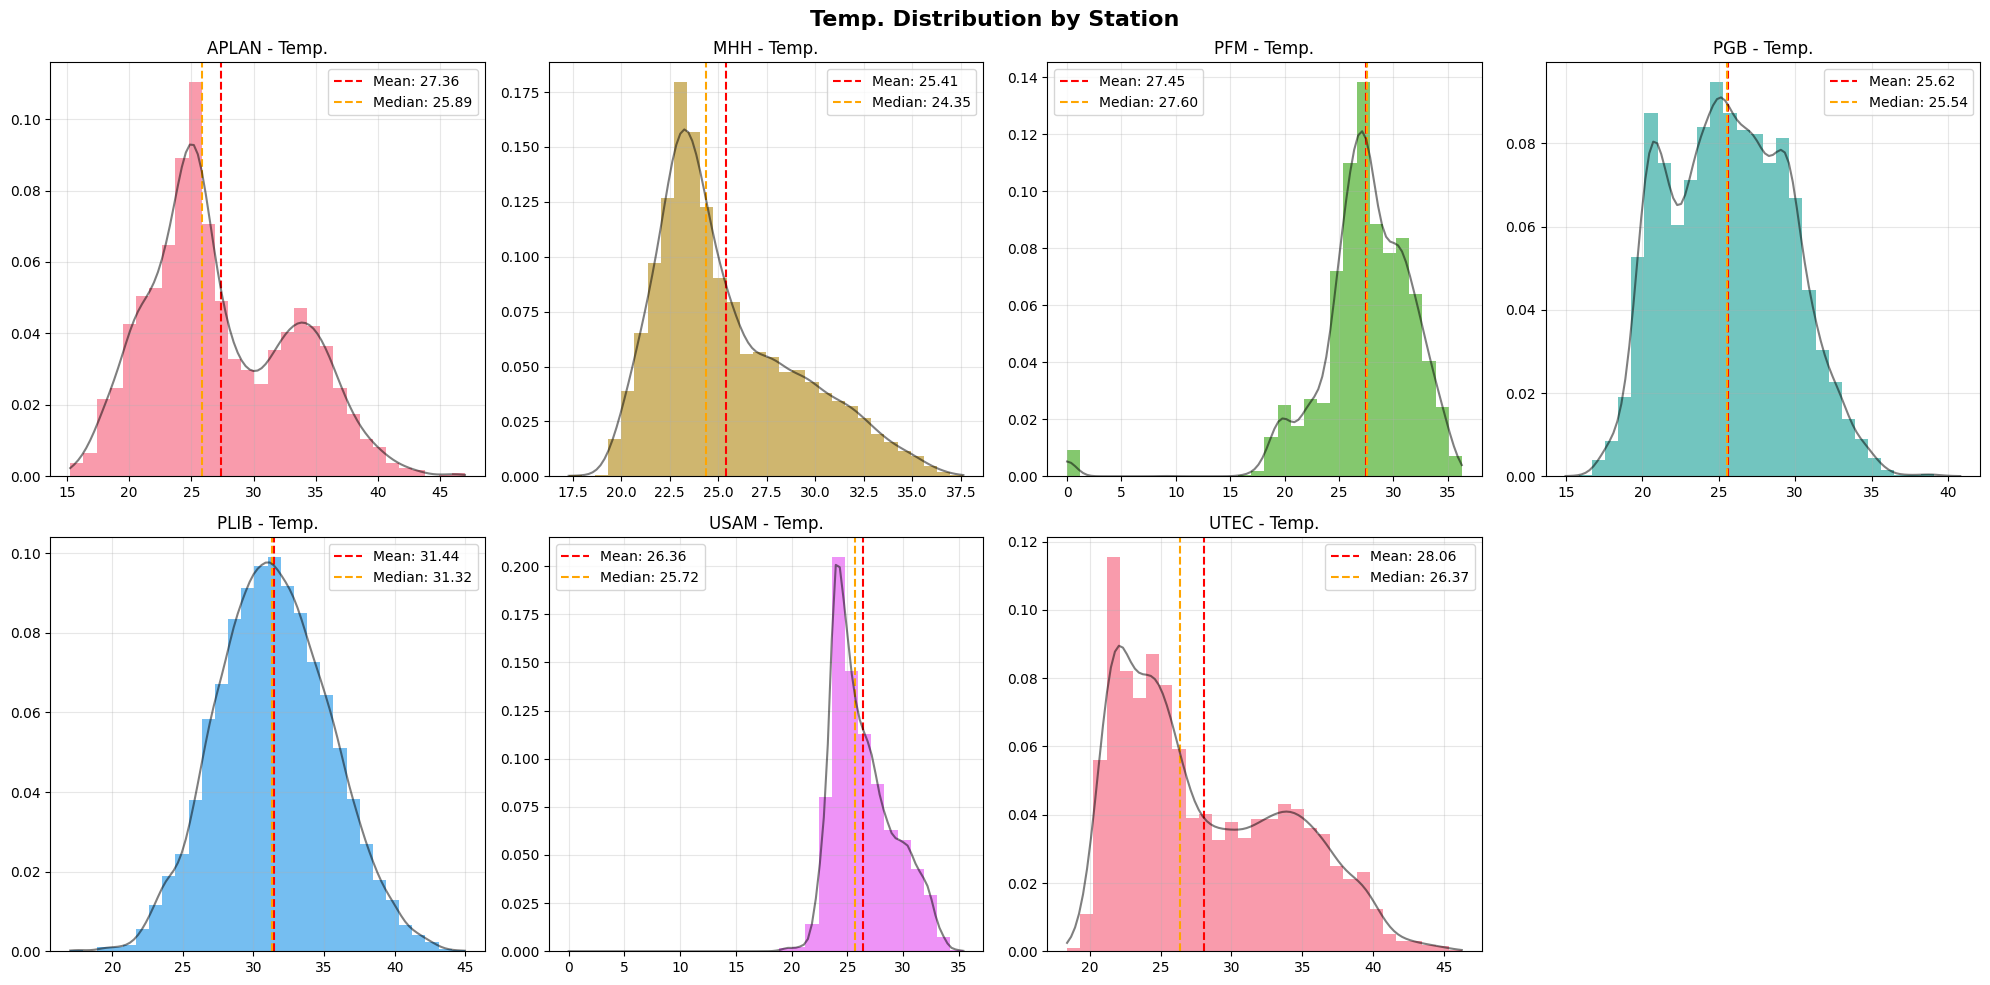

[2025-08-26 21:09:06] INFO: [OK] Generated distribution plots for Temp.


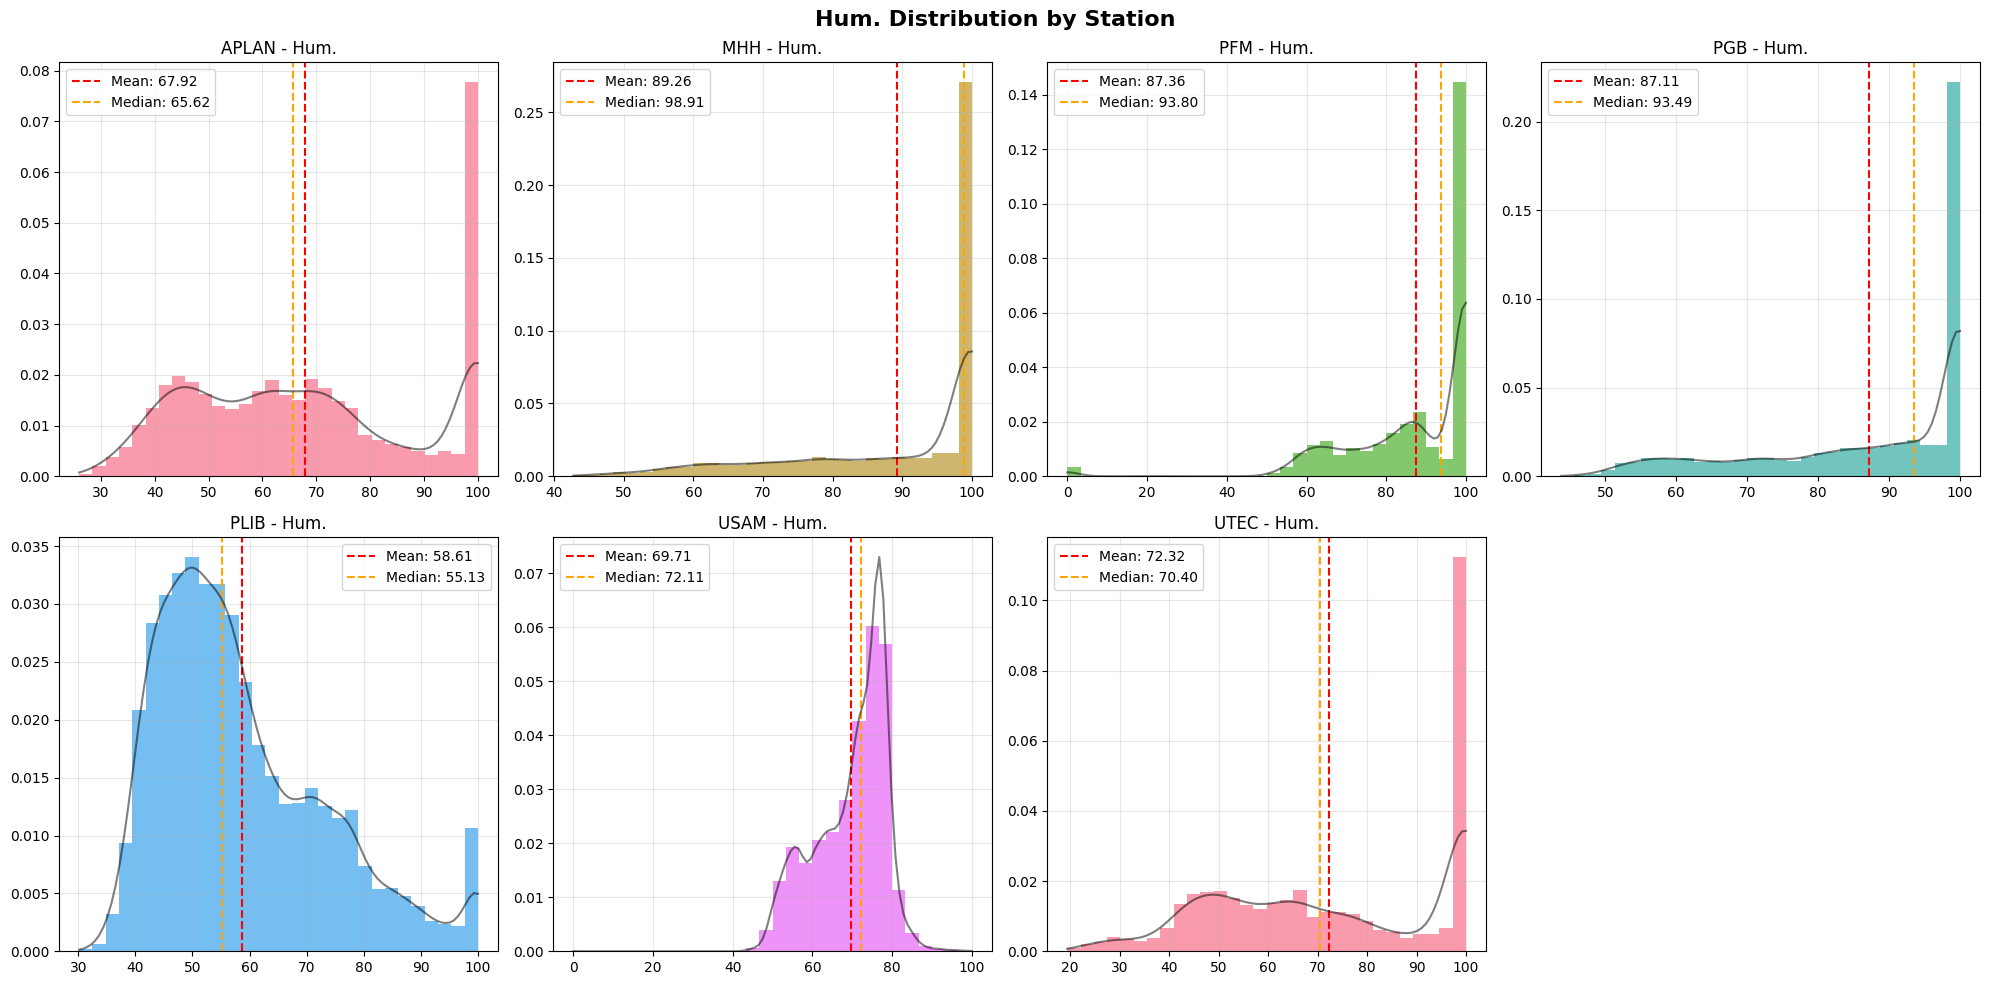

[2025-08-26 21:09:09] INFO: [OK] Generated distribution plots for Hum.


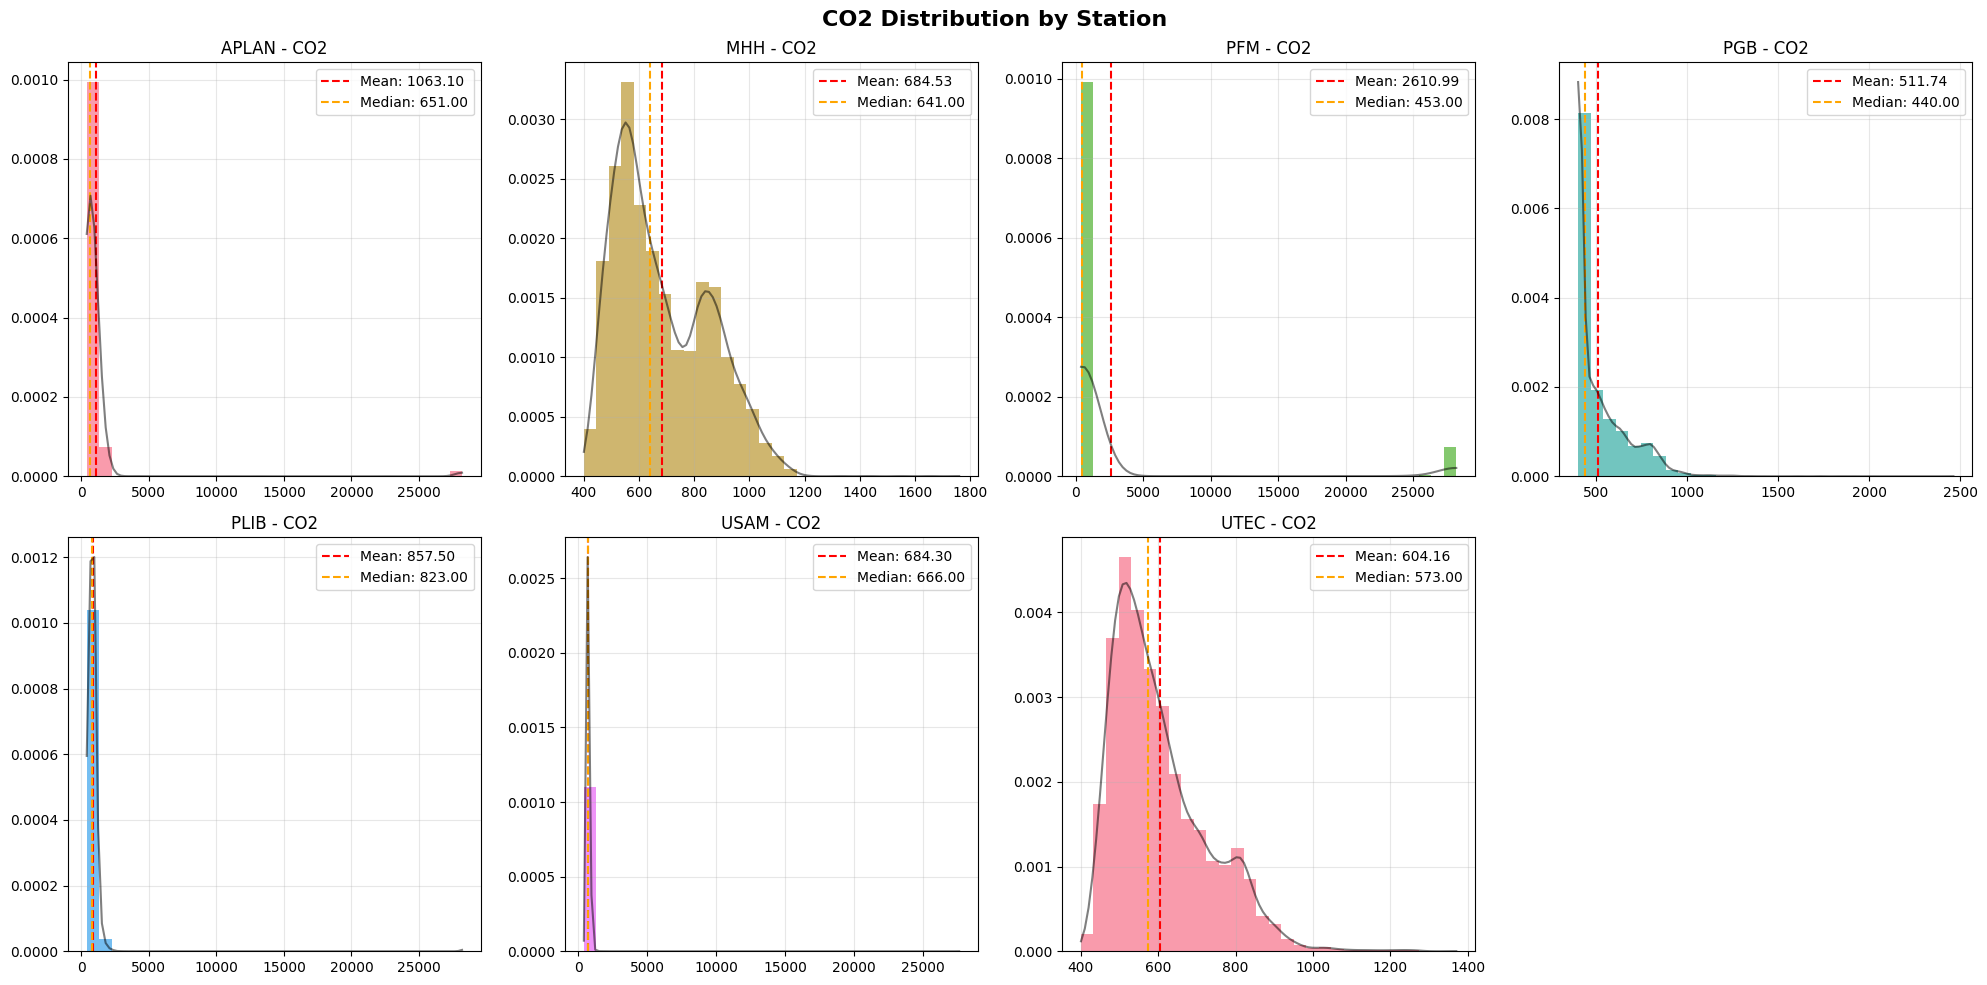

[2025-08-26 21:09:11] INFO: [OK] Generated distribution plots for CO2


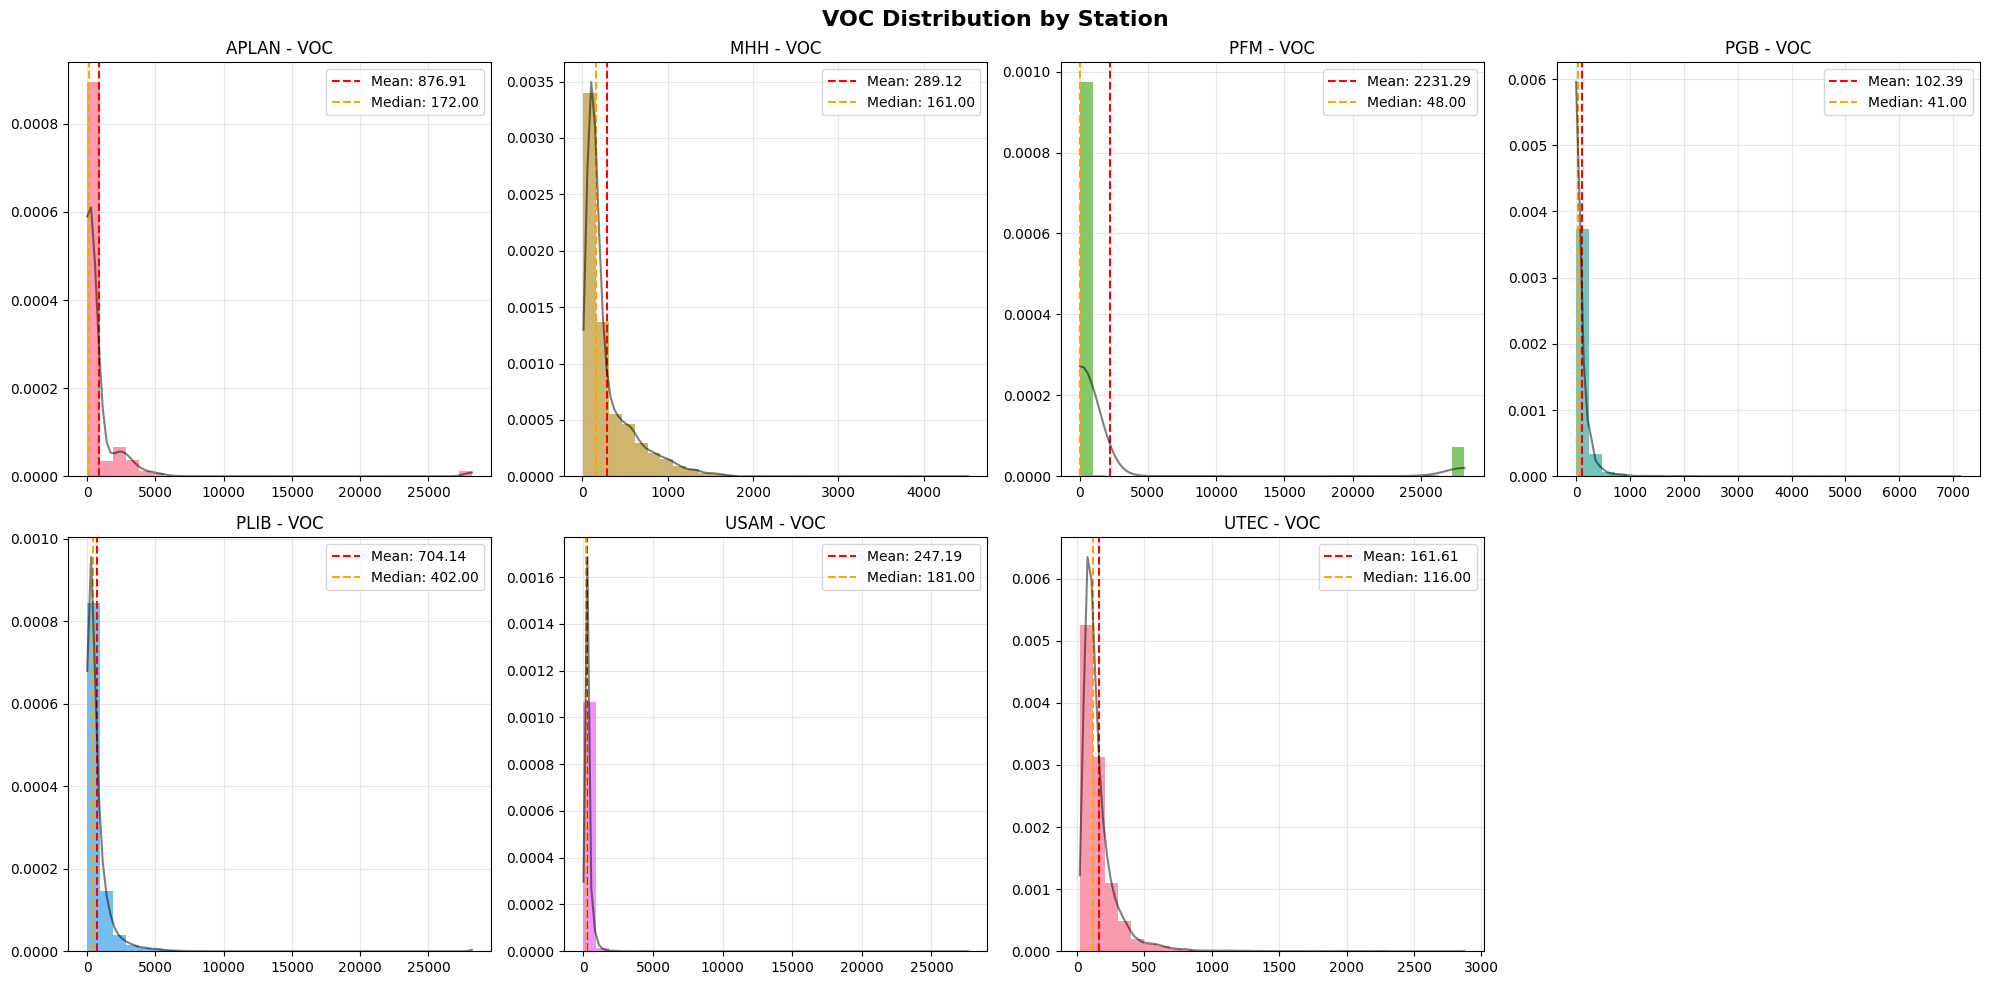

[2025-08-26 21:09:13] INFO: [OK] Generated distribution plots for VOC


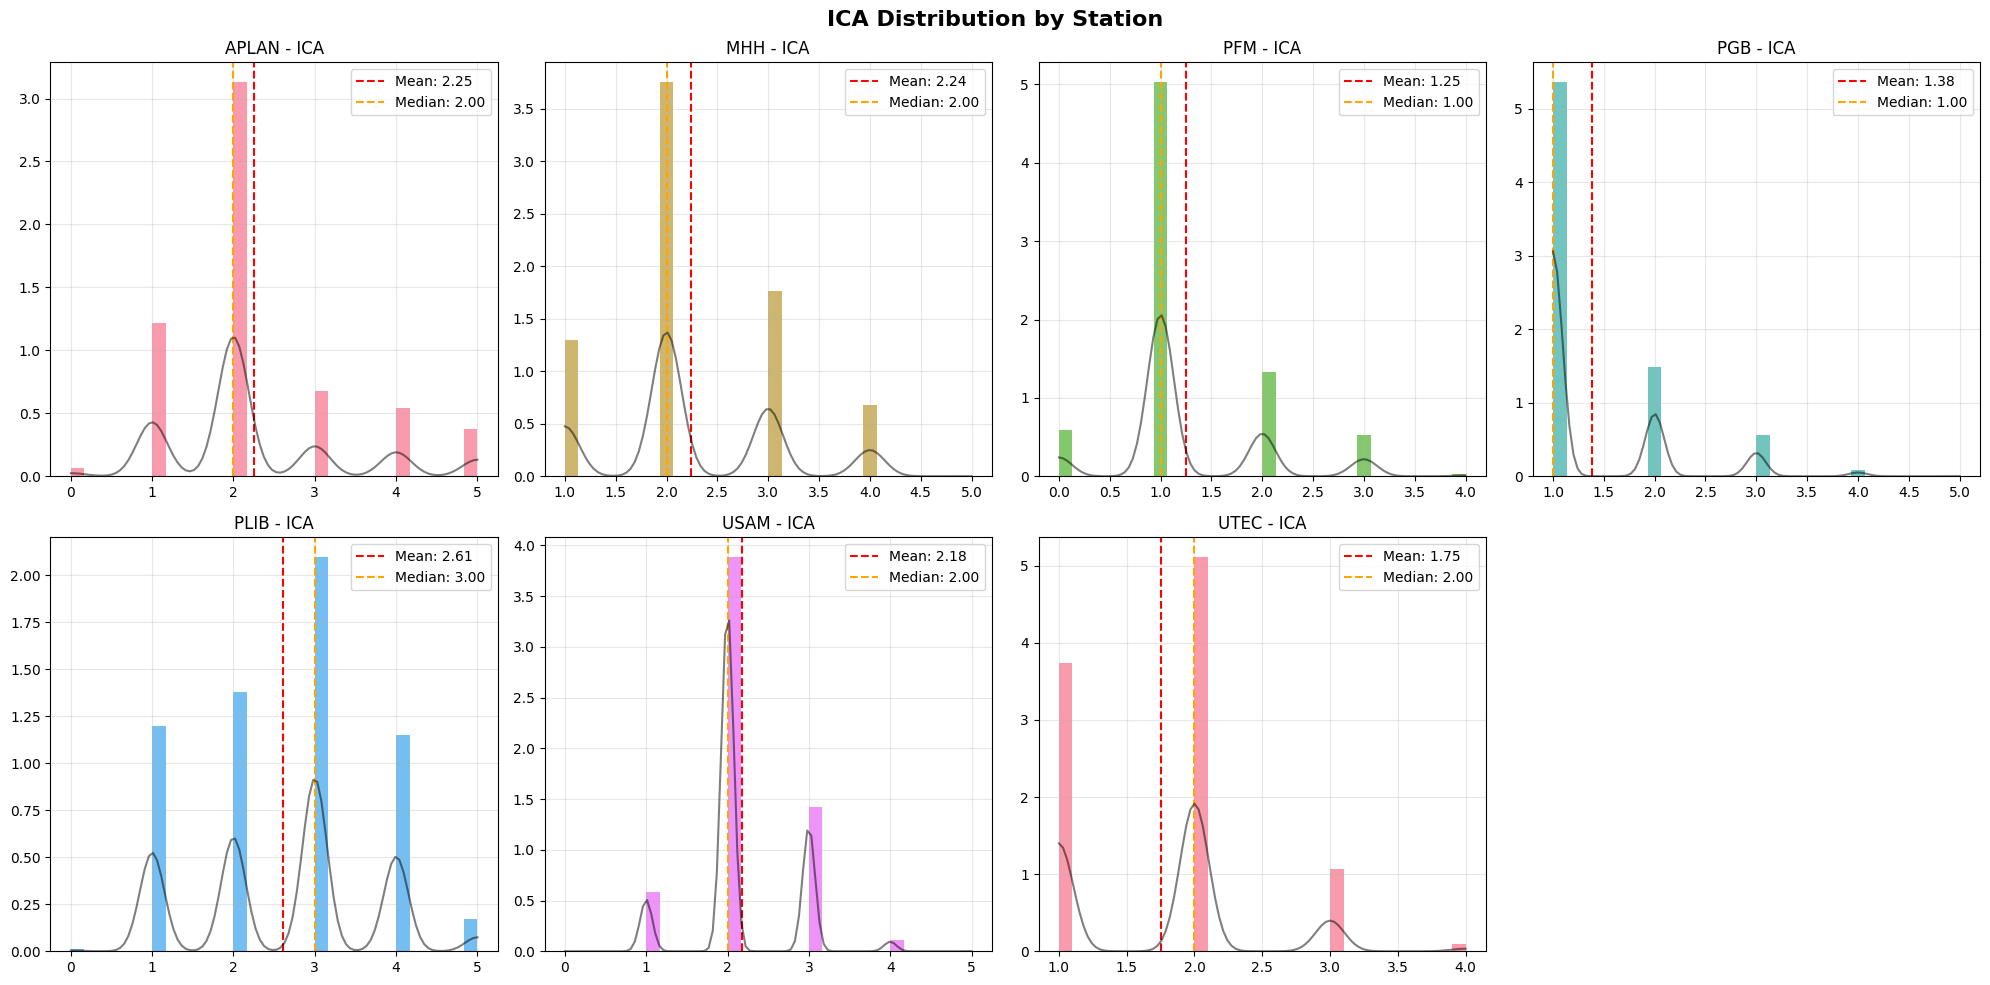

[2025-08-26 21:09:18] INFO: [OK] Generated distribution plots for ICA


In [8]:
plot_distributions(station_data)

[2025-08-26 21:09:44] INFO: 
[2025-08-26 21:09:44] INFO: CORRELATION ANALYSIS - SEPARATED PLOTS
[2025-08-26 21:09:44] INFO: ============================================================
[2025-08-26 21:09:44] INFO: Generating individual correlation matrices for each station...


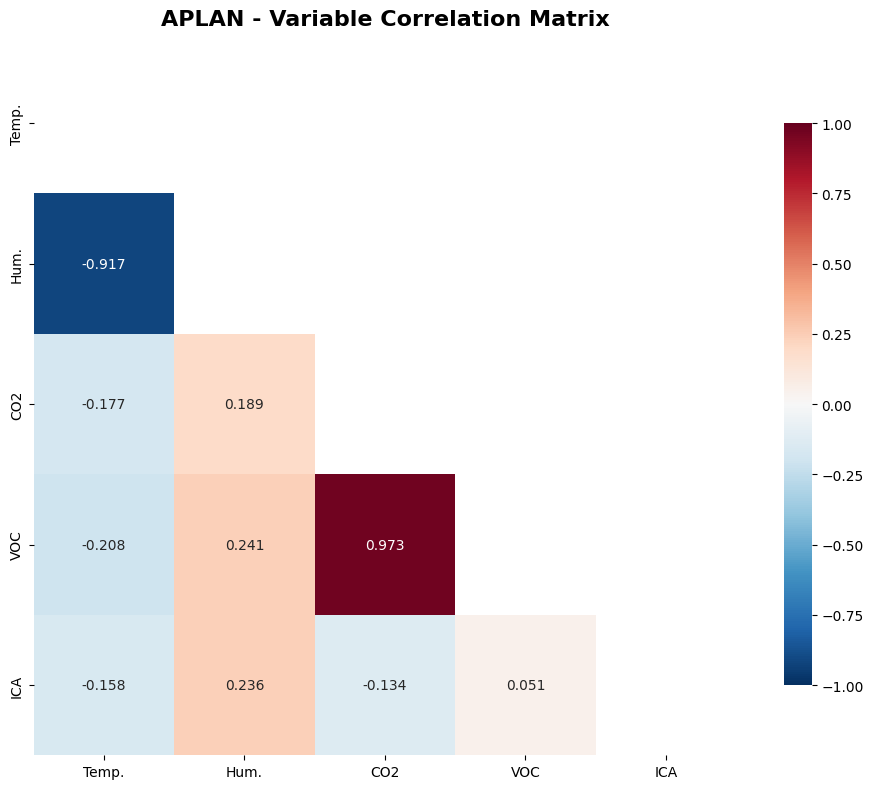

[2025-08-26 21:09:45] INFO: 
APLAN - Correlation Summary:
[2025-08-26 21:09:45] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:45] INFO: Data points: 6,920
[2025-08-26 21:09:45] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:45] INFO:   Temp. ↔ Hum.: -0.917
[2025-08-26 21:09:45] INFO:   CO2 ↔ VOC: 0.973
[2025-08-26 21:09:45] INFO: --------------------------------------------------


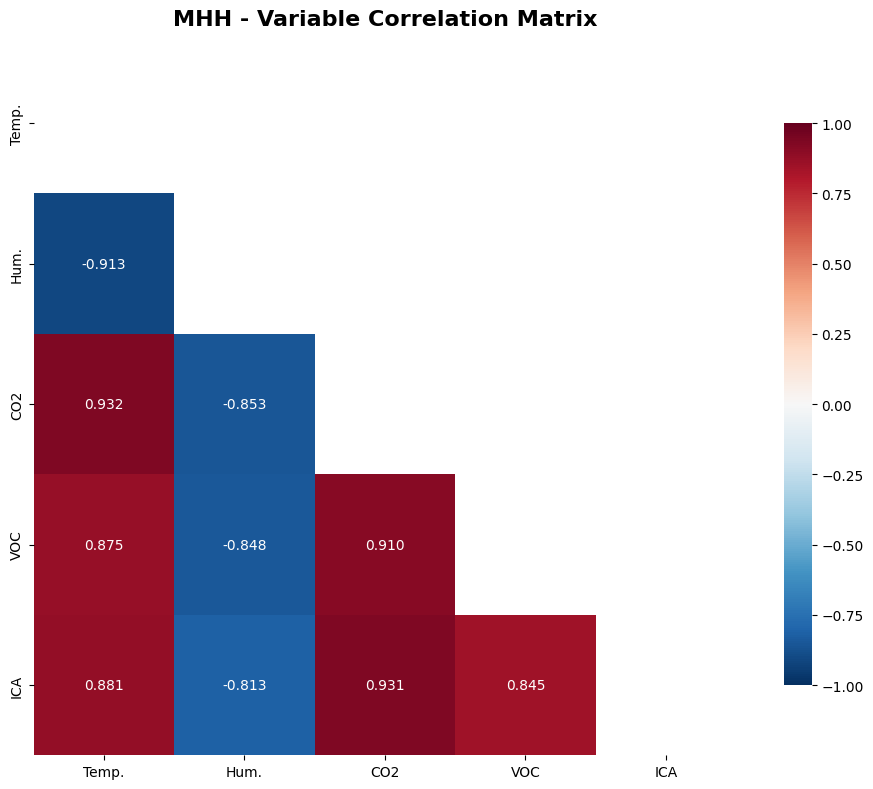

[2025-08-26 21:09:45] INFO: 
MHH - Correlation Summary:
[2025-08-26 21:09:45] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:45] INFO: Data points: 6,620
[2025-08-26 21:09:45] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:45] INFO:   Temp. ↔ Hum.: -0.913
[2025-08-26 21:09:45] INFO:   Temp. ↔ CO2: 0.932
[2025-08-26 21:09:45] INFO:   Temp. ↔ VOC: 0.875
[2025-08-26 21:09:45] INFO:   Temp. ↔ ICA: 0.881
[2025-08-26 21:09:45] INFO:   Hum. ↔ CO2: -0.853
[2025-08-26 21:09:45] INFO:   Hum. ↔ VOC: -0.848
[2025-08-26 21:09:45] INFO:   Hum. ↔ ICA: -0.813
[2025-08-26 21:09:45] INFO:   CO2 ↔ VOC: 0.910
[2025-08-26 21:09:45] INFO:   CO2 ↔ ICA: 0.931
[2025-08-26 21:09:45] INFO:   VOC ↔ ICA: 0.845
[2025-08-26 21:09:45] INFO: --------------------------------------------------


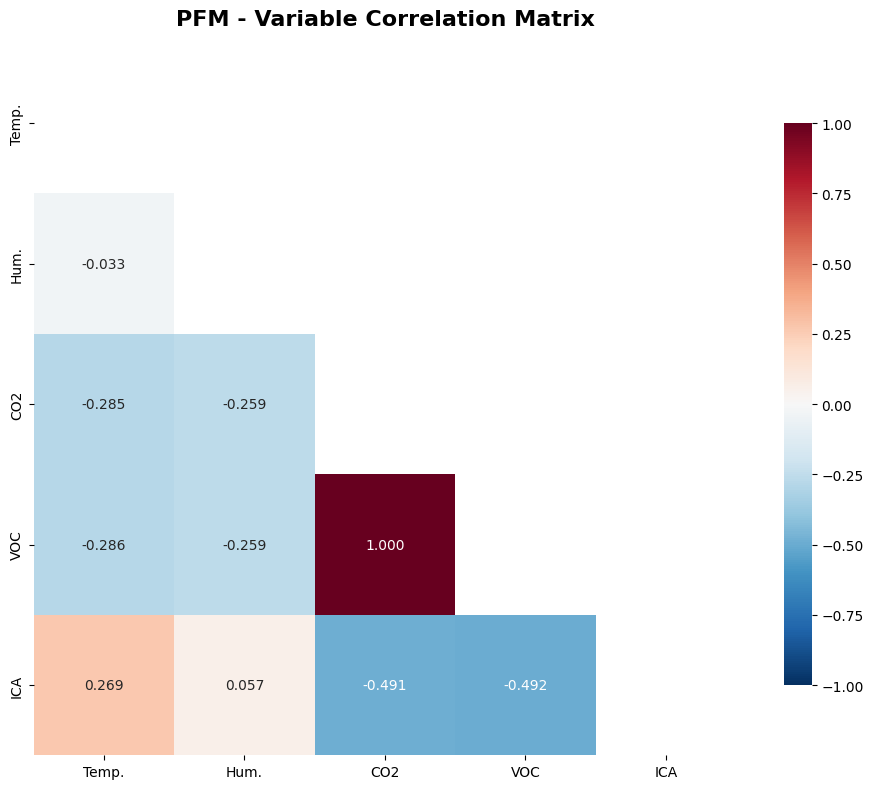

[2025-08-26 21:09:46] INFO: 
PFM - Correlation Summary:
[2025-08-26 21:09:46] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:46] INFO: Data points: 4,911
[2025-08-26 21:09:46] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:46] INFO:   CO2 ↔ VOC: 1.000
[2025-08-26 21:09:46] INFO: --------------------------------------------------


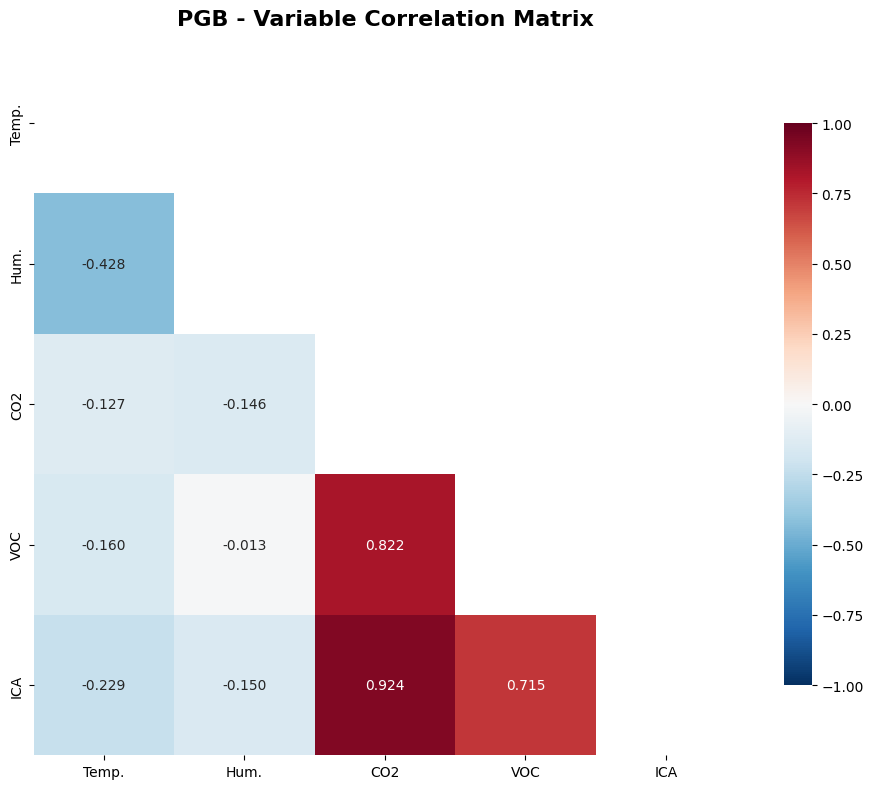

[2025-08-26 21:09:46] INFO: 
PGB - Correlation Summary:
[2025-08-26 21:09:46] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:46] INFO: Data points: 20,474
[2025-08-26 21:09:46] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:46] INFO:   CO2 ↔ VOC: 0.822
[2025-08-26 21:09:46] INFO:   CO2 ↔ ICA: 0.924
[2025-08-26 21:09:46] INFO:   VOC ↔ ICA: 0.715
[2025-08-26 21:09:46] INFO: --------------------------------------------------


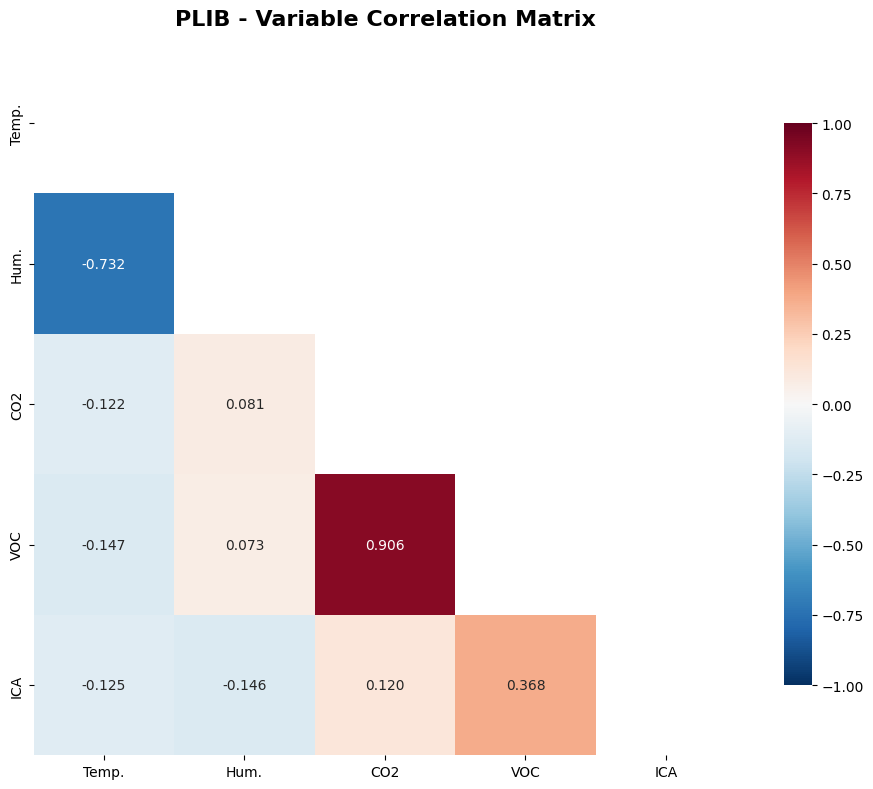

[2025-08-26 21:09:46] INFO: 
PLIB - Correlation Summary:
[2025-08-26 21:09:46] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:46] INFO: Data points: 19,601
[2025-08-26 21:09:46] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:46] INFO:   Temp. ↔ Hum.: -0.732
[2025-08-26 21:09:46] INFO:   CO2 ↔ VOC: 0.906
[2025-08-26 21:09:46] INFO: --------------------------------------------------


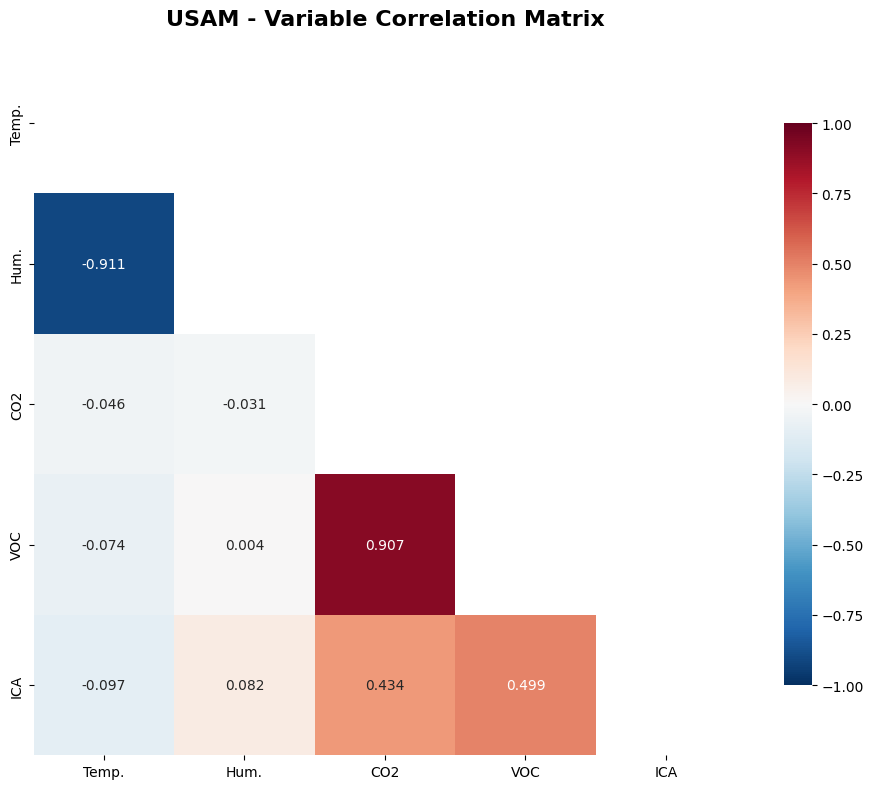

[2025-08-26 21:09:47] INFO: 
USAM - Correlation Summary:
[2025-08-26 21:09:47] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:47] INFO: Data points: 33,451
[2025-08-26 21:09:47] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:47] INFO:   Temp. ↔ Hum.: -0.911
[2025-08-26 21:09:47] INFO:   CO2 ↔ VOC: 0.907
[2025-08-26 21:09:47] INFO: --------------------------------------------------


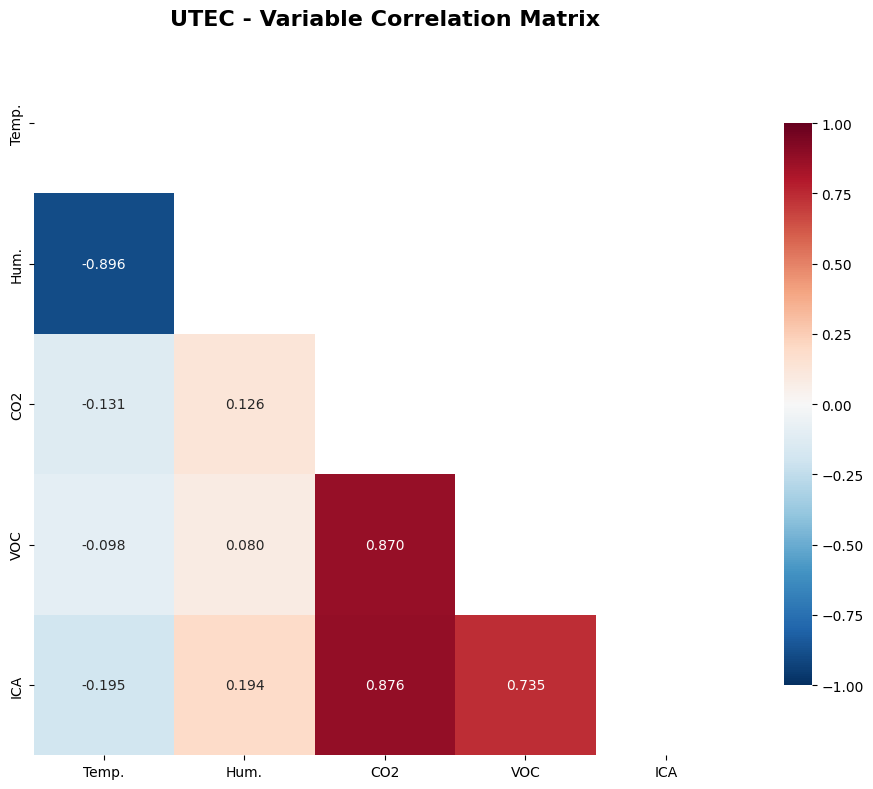

[2025-08-26 21:09:47] INFO: 
UTEC - Correlation Summary:
[2025-08-26 21:09:47] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:47] INFO: Data points: 10,085
[2025-08-26 21:09:47] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:47] INFO:   Temp. ↔ Hum.: -0.896
[2025-08-26 21:09:47] INFO:   CO2 ↔ VOC: 0.870
[2025-08-26 21:09:47] INFO:   CO2 ↔ ICA: 0.876
[2025-08-26 21:09:47] INFO:   VOC ↔ ICA: 0.735
[2025-08-26 21:09:47] INFO: --------------------------------------------------
[2025-08-26 21:09:47] INFO: 
Generating cross-station correlations for each variable...


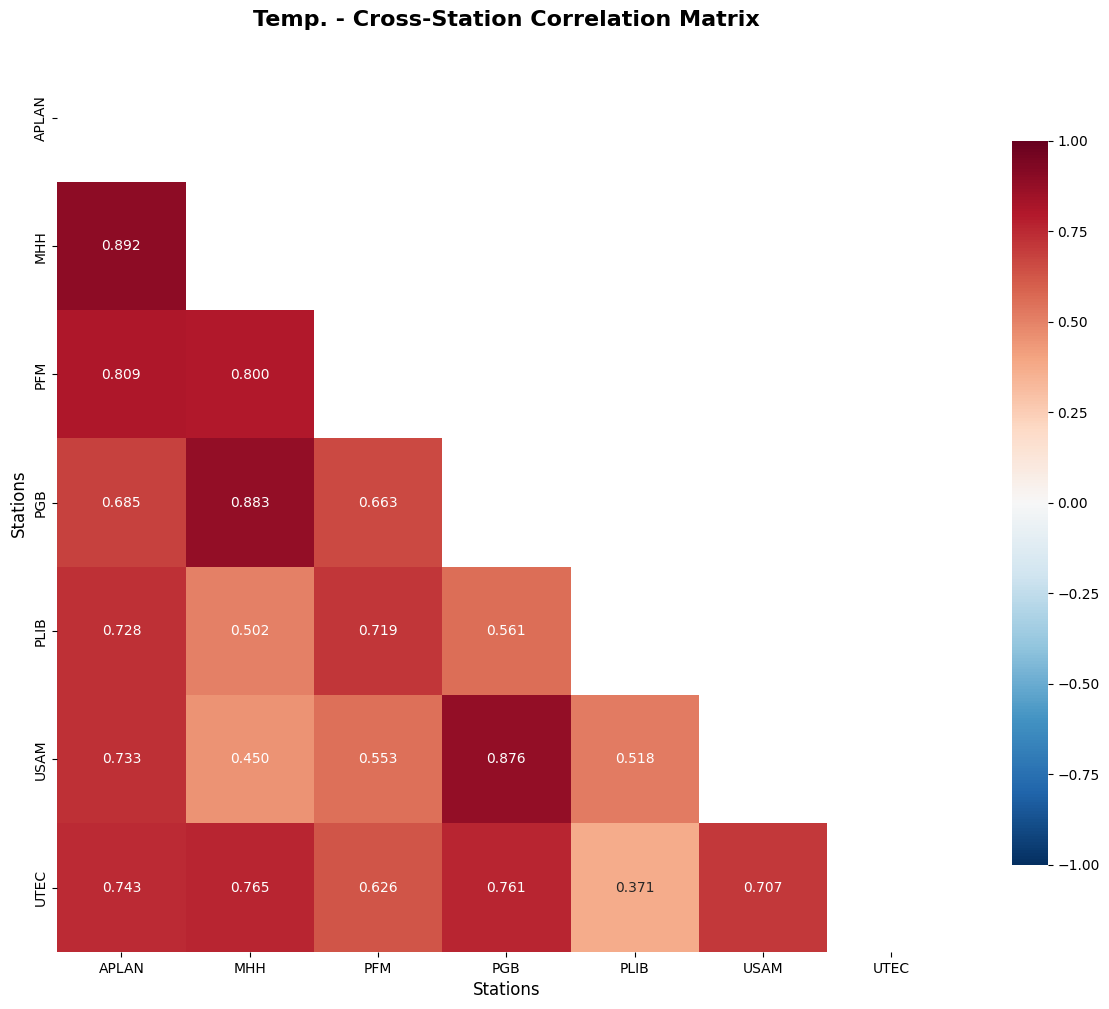

[2025-08-26 21:09:48] INFO: 
Temp. - Cross-Station Correlation Summary:
[2025-08-26 21:09:48] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:09:48] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:09:48] INFO: Highest correlations between stations:
[2025-08-26 21:09:48] INFO:   1. APLAN ↔ MHH: 0.892
[2025-08-26 21:09:48] INFO:   2. MHH ↔ PGB: 0.883
[2025-08-26 21:09:48] INFO:   3. PGB ↔ USAM: 0.876
[2025-08-26 21:09:48] INFO: ------------------------------------------------------------


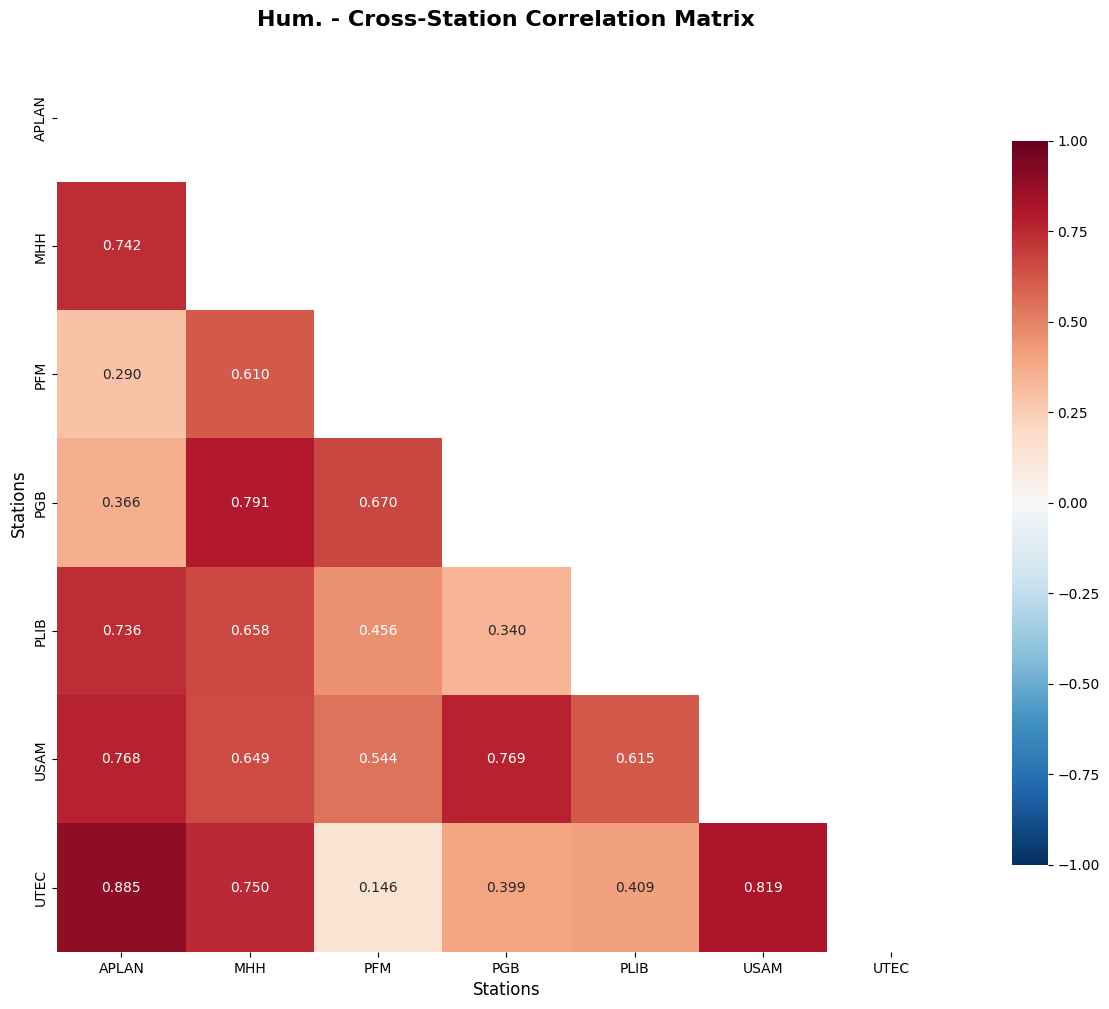

[2025-08-26 21:09:48] INFO: 
Hum. - Cross-Station Correlation Summary:
[2025-08-26 21:09:48] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:09:48] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:09:48] INFO: Highest correlations between stations:
[2025-08-26 21:09:48] INFO:   1. APLAN ↔ UTEC: 0.885
[2025-08-26 21:09:48] INFO:   2. USAM ↔ UTEC: 0.819
[2025-08-26 21:09:48] INFO:   3. MHH ↔ PGB: 0.791
[2025-08-26 21:09:48] INFO: ------------------------------------------------------------


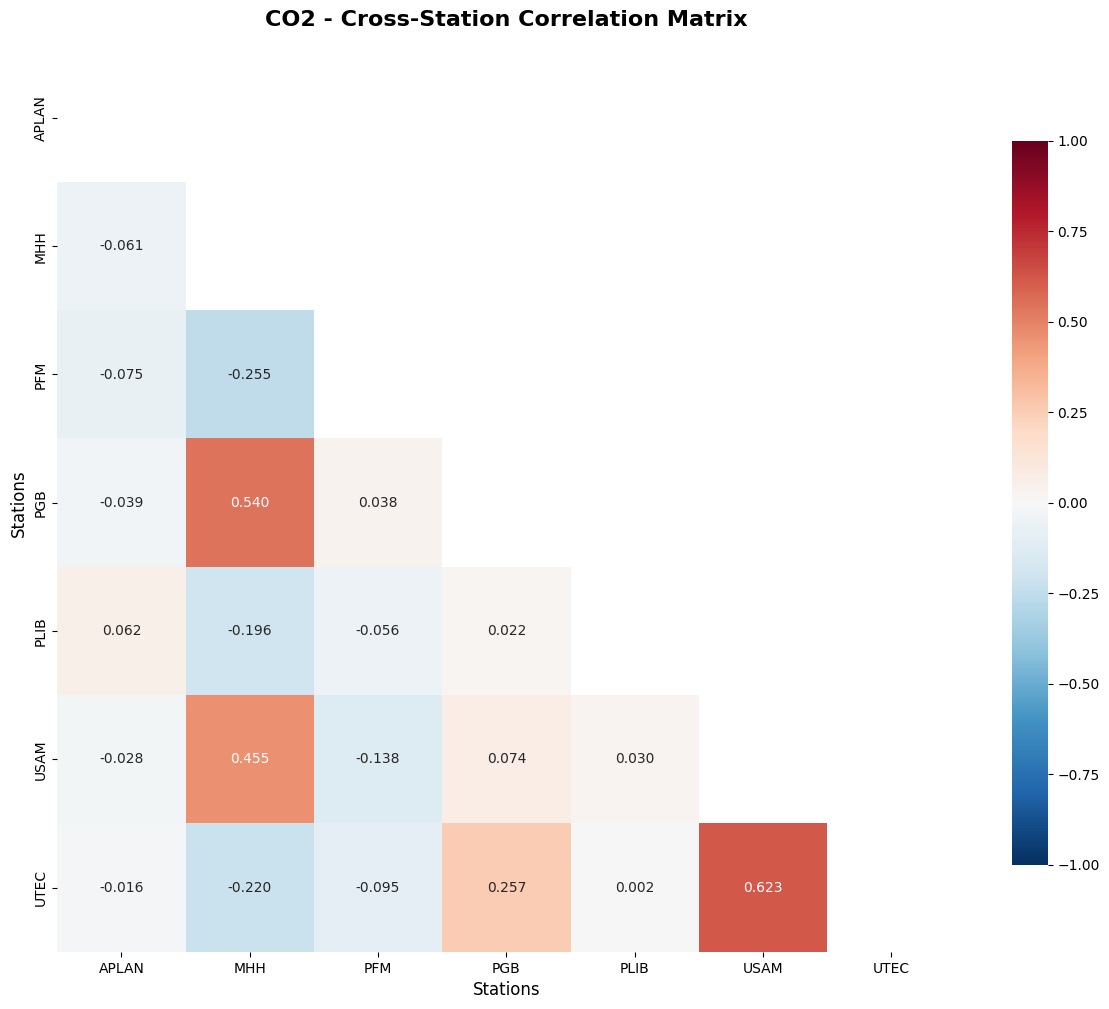

[2025-08-26 21:09:49] INFO: 
CO2 - Cross-Station Correlation Summary:
[2025-08-26 21:09:49] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:09:49] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:09:49] INFO: Highest correlations between stations:
[2025-08-26 21:09:49] INFO:   1. USAM ↔ UTEC: 0.623
[2025-08-26 21:09:49] INFO:   2. MHH ↔ PGB: 0.540
[2025-08-26 21:09:49] INFO:   3. MHH ↔ USAM: 0.455
[2025-08-26 21:09:49] INFO: ------------------------------------------------------------


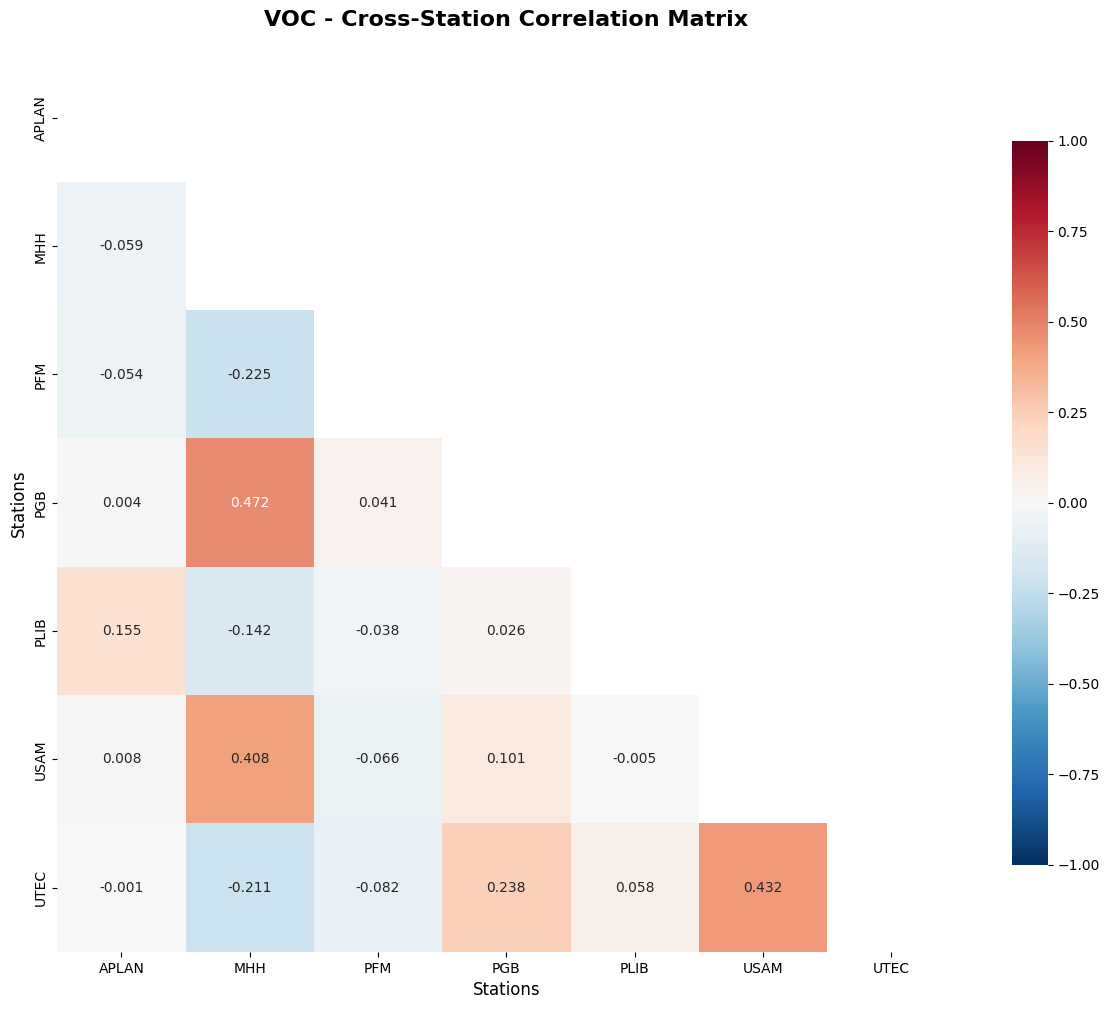

[2025-08-26 21:09:50] INFO: 
VOC - Cross-Station Correlation Summary:
[2025-08-26 21:09:50] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:09:50] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:09:50] INFO: Highest correlations between stations:
[2025-08-26 21:09:50] INFO:   1. MHH ↔ PGB: 0.472
[2025-08-26 21:09:50] INFO:   2. USAM ↔ UTEC: 0.432
[2025-08-26 21:09:50] INFO:   3. MHH ↔ USAM: 0.408
[2025-08-26 21:09:50] INFO: ------------------------------------------------------------


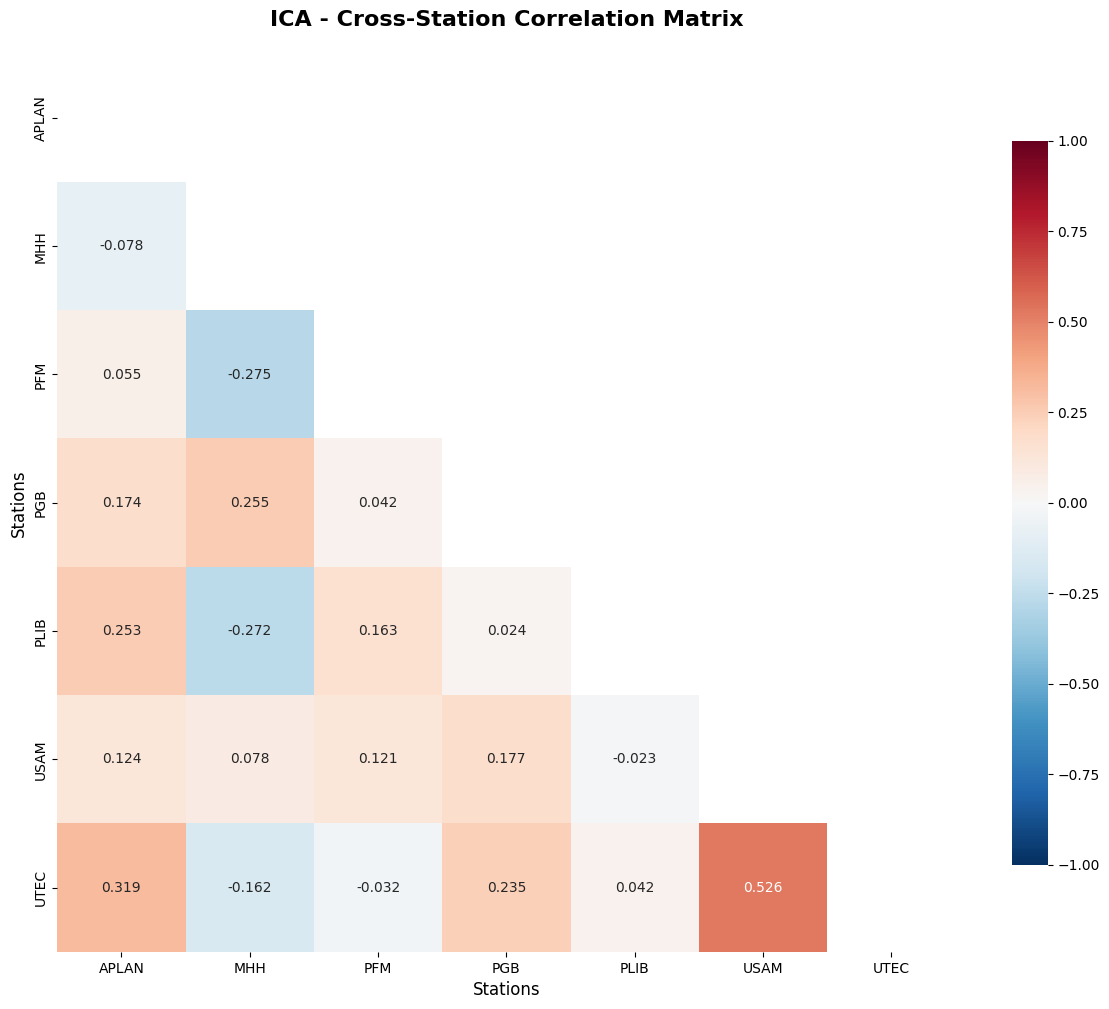

[2025-08-26 21:09:51] INFO: 
ICA - Cross-Station Correlation Summary:
[2025-08-26 21:09:51] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:09:51] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:09:51] INFO: Highest correlations between stations:
[2025-08-26 21:09:51] INFO:   1. USAM ↔ UTEC: 0.526
[2025-08-26 21:09:51] INFO:   2. APLAN ↔ UTEC: 0.319
[2025-08-26 21:09:51] INFO:   3. MHH ↔ PFM: -0.275
[2025-08-26 21:09:51] INFO: ------------------------------------------------------------
[2025-08-26 21:09:51] INFO: [OK] Generated separated correlation matrices for all stations and variables


In [9]:
# Correlation analysis
analyze_correlations(station_data)

[2025-08-26 21:09:58] INFO: 
[2025-08-26 21:09:58] INFO: CORRELATION ANALYSIS - SEPARATED PLOTS
[2025-08-26 21:09:58] INFO: ============================================================
[2025-08-26 21:09:58] INFO: Generating individual correlation matrices for each station...


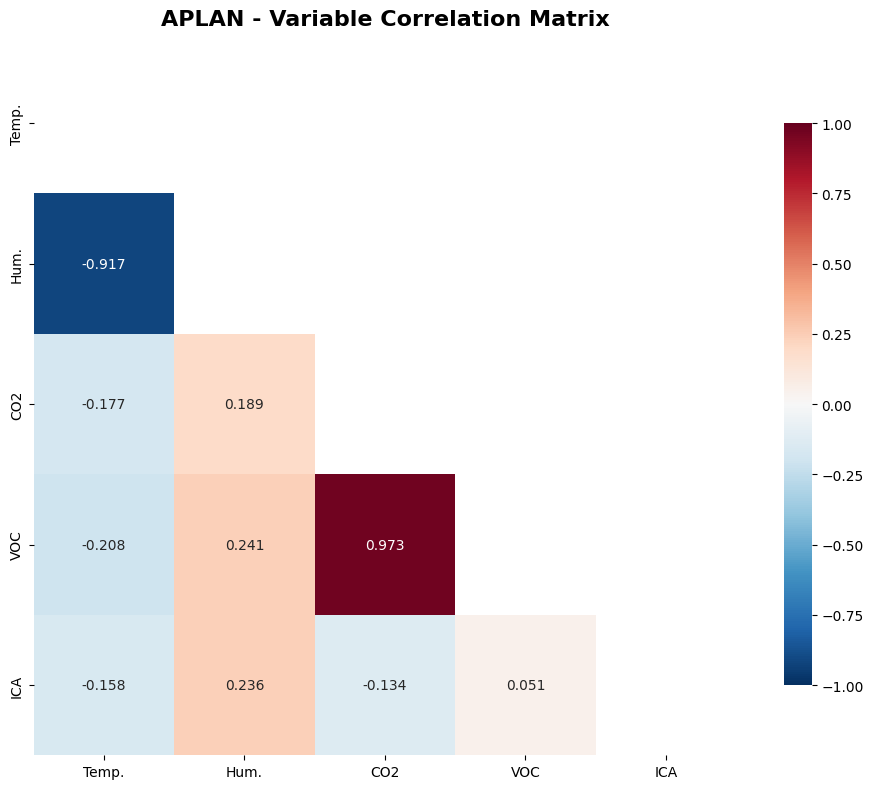

[2025-08-26 21:09:58] INFO: 
APLAN - Correlation Summary:
[2025-08-26 21:09:58] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:58] INFO: Data points: 6,920
[2025-08-26 21:09:58] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:58] INFO:   Temp. ↔ Hum.: -0.917
[2025-08-26 21:09:58] INFO:   CO2 ↔ VOC: 0.973
[2025-08-26 21:09:58] INFO: --------------------------------------------------


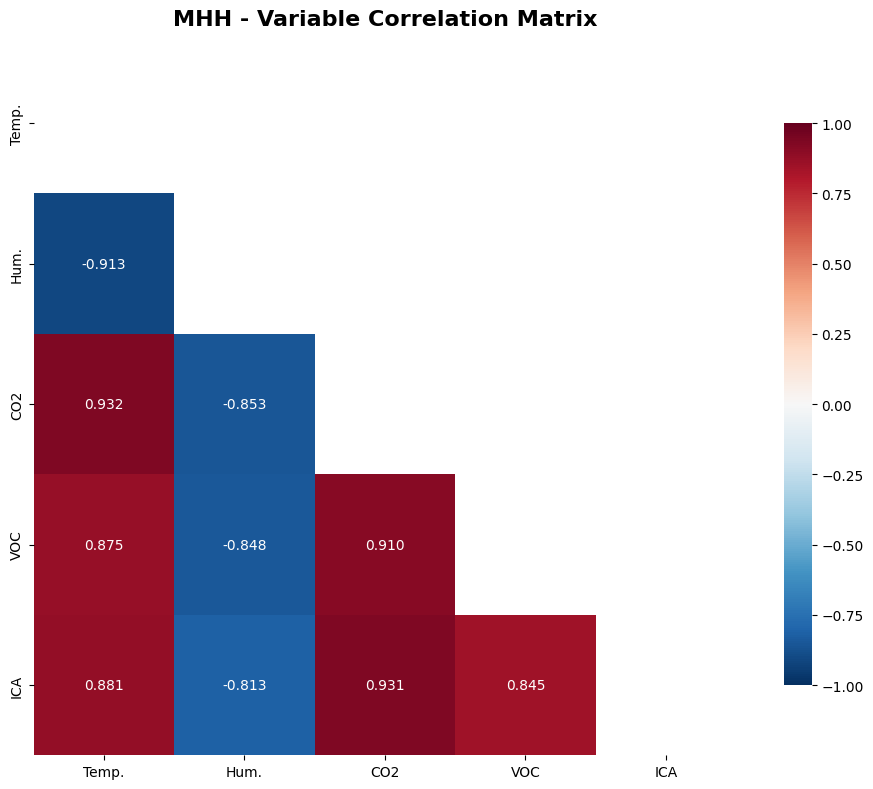

[2025-08-26 21:09:59] INFO: 
MHH - Correlation Summary:
[2025-08-26 21:09:59] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:59] INFO: Data points: 6,620
[2025-08-26 21:09:59] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:59] INFO:   Temp. ↔ Hum.: -0.913
[2025-08-26 21:09:59] INFO:   Temp. ↔ CO2: 0.932
[2025-08-26 21:09:59] INFO:   Temp. ↔ VOC: 0.875
[2025-08-26 21:09:59] INFO:   Temp. ↔ ICA: 0.881
[2025-08-26 21:09:59] INFO:   Hum. ↔ CO2: -0.853
[2025-08-26 21:09:59] INFO:   Hum. ↔ VOC: -0.848
[2025-08-26 21:09:59] INFO:   Hum. ↔ ICA: -0.813
[2025-08-26 21:09:59] INFO:   CO2 ↔ VOC: 0.910
[2025-08-26 21:09:59] INFO:   CO2 ↔ ICA: 0.931
[2025-08-26 21:09:59] INFO:   VOC ↔ ICA: 0.845
[2025-08-26 21:09:59] INFO: --------------------------------------------------


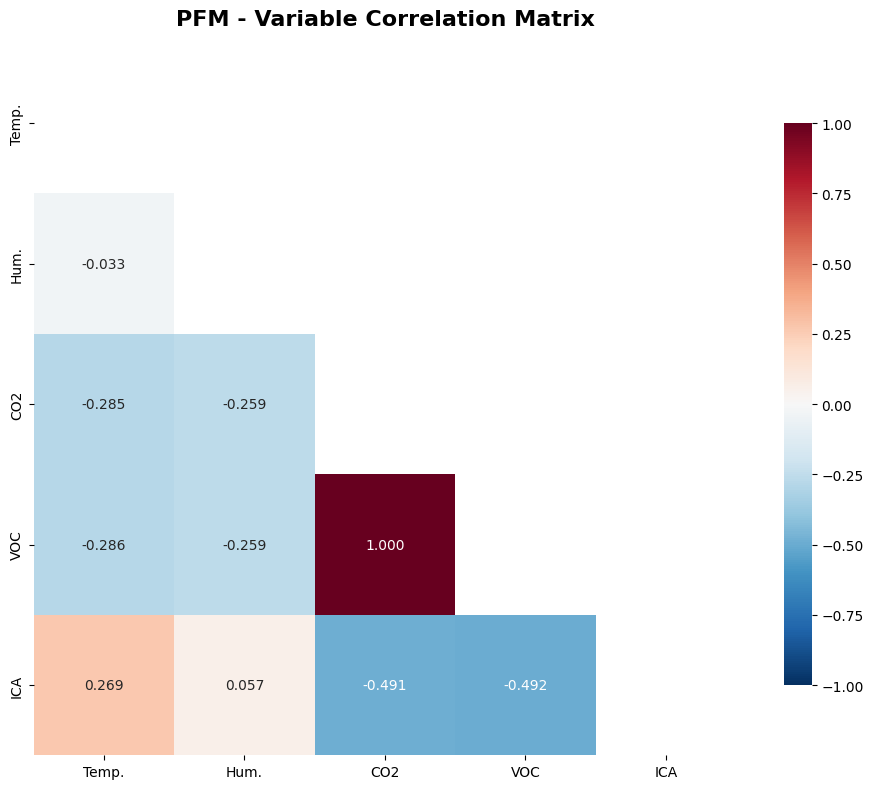

[2025-08-26 21:09:59] INFO: 
PFM - Correlation Summary:
[2025-08-26 21:09:59] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:09:59] INFO: Data points: 4,911
[2025-08-26 21:09:59] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:09:59] INFO:   CO2 ↔ VOC: 1.000
[2025-08-26 21:09:59] INFO: --------------------------------------------------


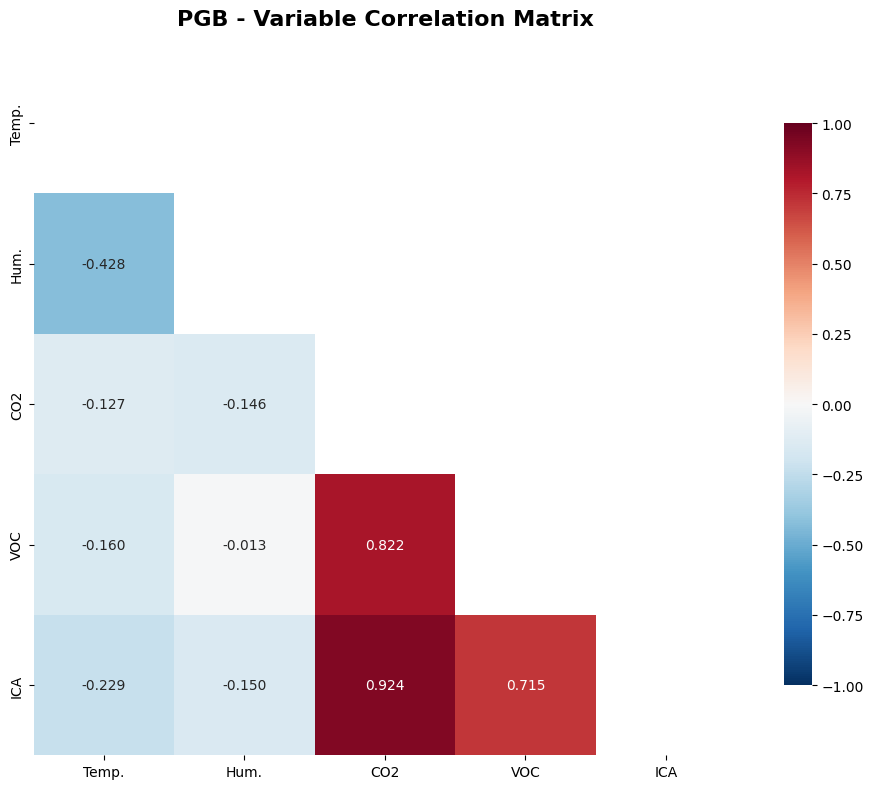

[2025-08-26 21:10:00] INFO: 
PGB - Correlation Summary:
[2025-08-26 21:10:00] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:10:00] INFO: Data points: 20,474
[2025-08-26 21:10:00] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:10:00] INFO:   CO2 ↔ VOC: 0.822
[2025-08-26 21:10:00] INFO:   CO2 ↔ ICA: 0.924
[2025-08-26 21:10:00] INFO:   VOC ↔ ICA: 0.715
[2025-08-26 21:10:00] INFO: --------------------------------------------------


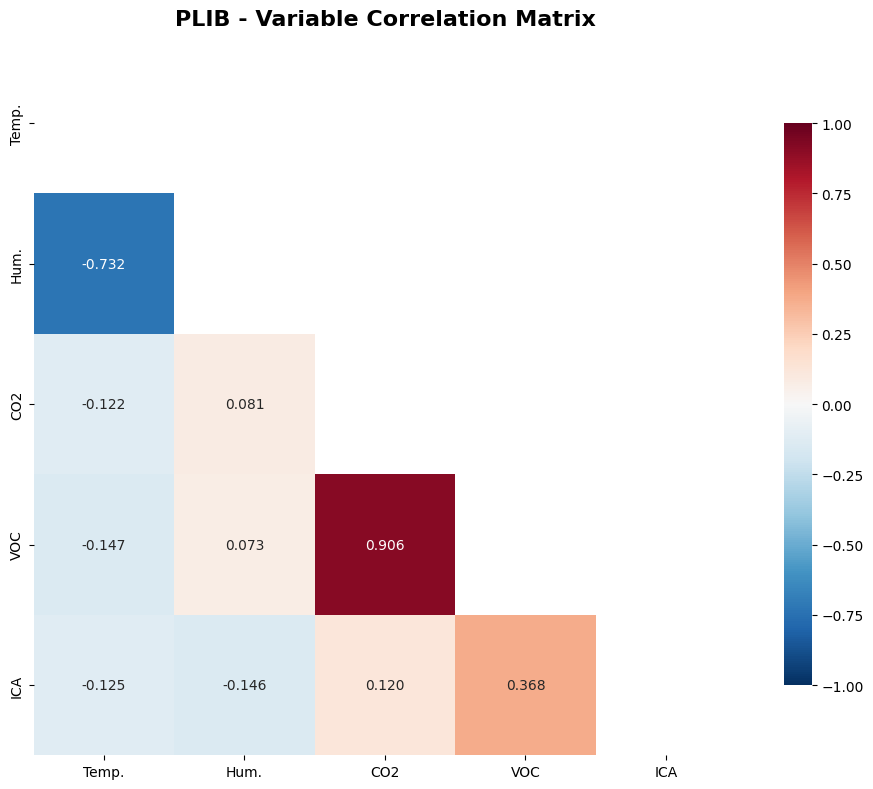

[2025-08-26 21:10:00] INFO: 
PLIB - Correlation Summary:
[2025-08-26 21:10:00] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:10:00] INFO: Data points: 19,601
[2025-08-26 21:10:00] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:10:00] INFO:   Temp. ↔ Hum.: -0.732
[2025-08-26 21:10:00] INFO:   CO2 ↔ VOC: 0.906
[2025-08-26 21:10:00] INFO: --------------------------------------------------


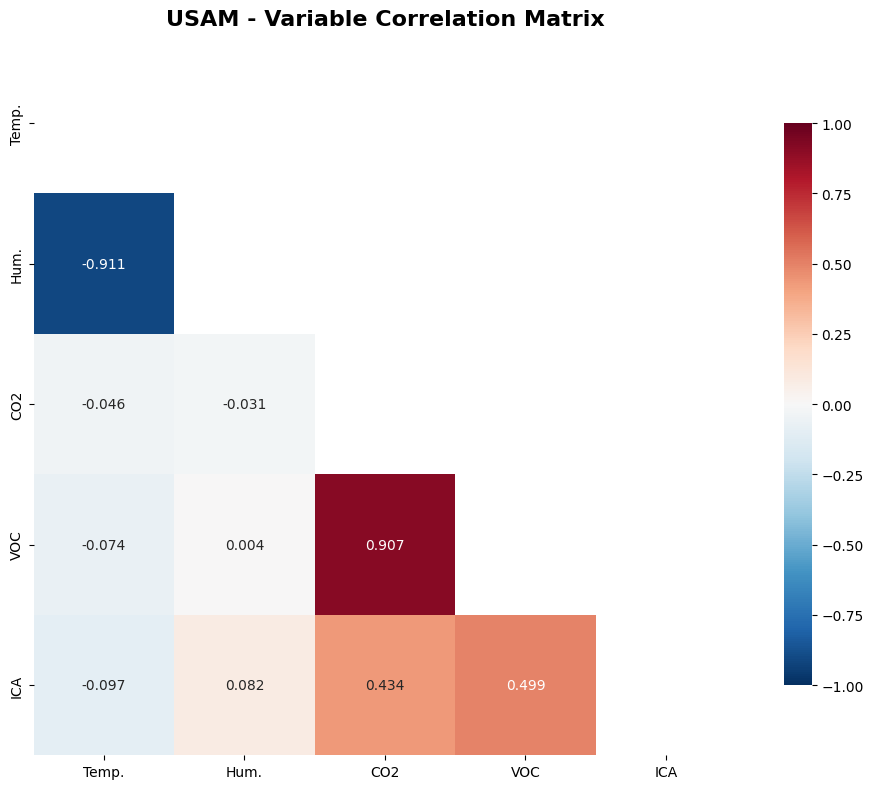

[2025-08-26 21:10:01] INFO: 
USAM - Correlation Summary:
[2025-08-26 21:10:01] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:10:01] INFO: Data points: 33,451
[2025-08-26 21:10:01] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:10:01] INFO:   Temp. ↔ Hum.: -0.911
[2025-08-26 21:10:01] INFO:   CO2 ↔ VOC: 0.907
[2025-08-26 21:10:01] INFO: --------------------------------------------------


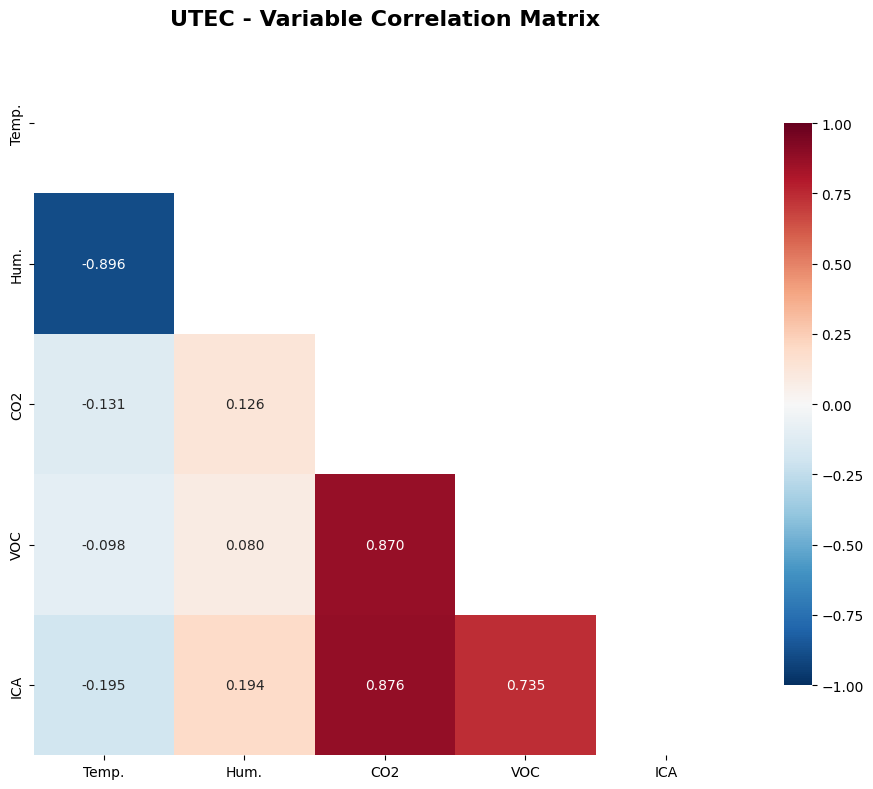

[2025-08-26 21:10:01] INFO: 
UTEC - Correlation Summary:
[2025-08-26 21:10:01] INFO: Variables analyzed: Temp., Hum., CO2, VOC, ICA
[2025-08-26 21:10:01] INFO: Data points: 10,085
[2025-08-26 21:10:01] INFO: Strong correlations (|r| > 0.7):
[2025-08-26 21:10:01] INFO:   Temp. ↔ Hum.: -0.896
[2025-08-26 21:10:01] INFO:   CO2 ↔ VOC: 0.870
[2025-08-26 21:10:01] INFO:   CO2 ↔ ICA: 0.876
[2025-08-26 21:10:01] INFO:   VOC ↔ ICA: 0.735
[2025-08-26 21:10:01] INFO: --------------------------------------------------
[2025-08-26 21:10:01] INFO: 
Generating cross-station correlations for each variable...


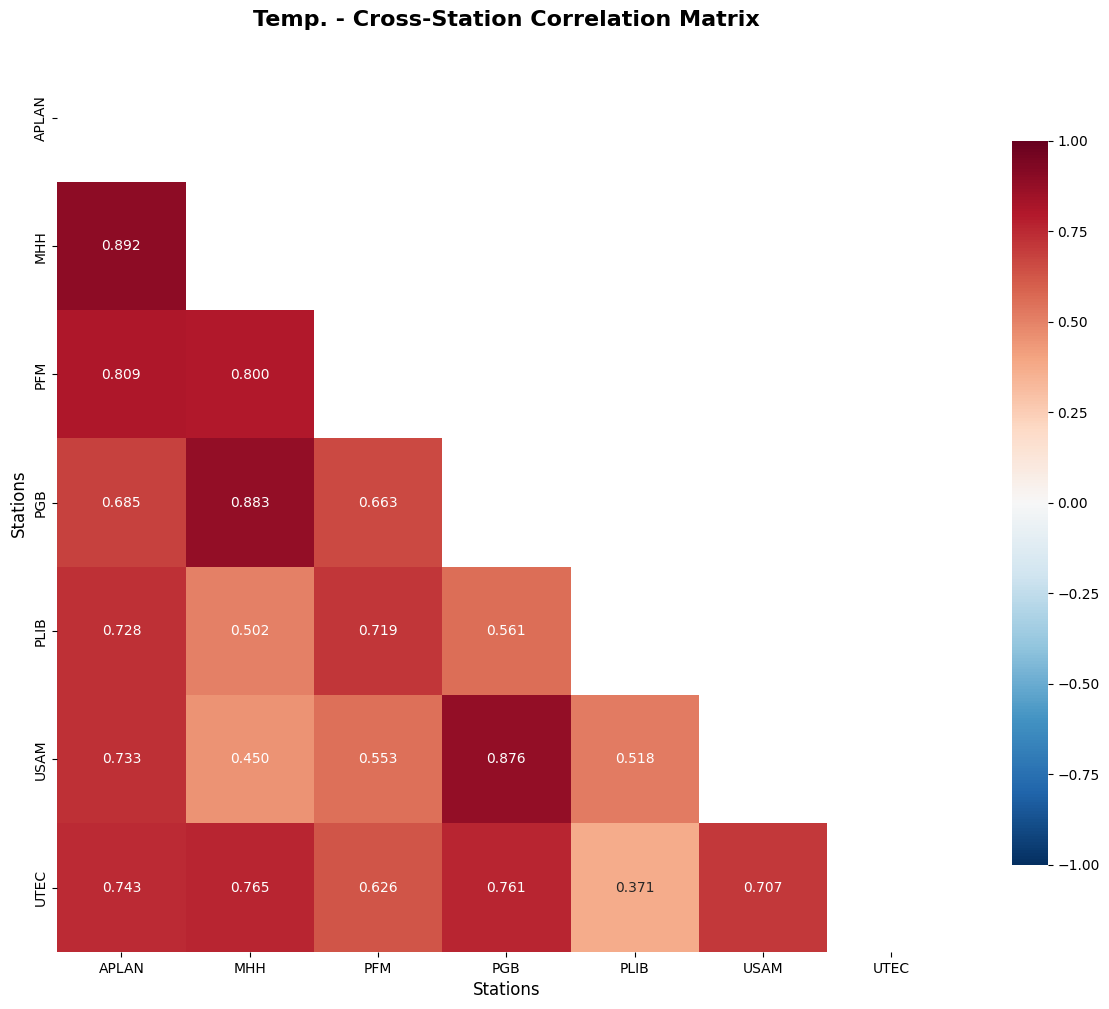

[2025-08-26 21:10:02] INFO: 
Temp. - Cross-Station Correlation Summary:
[2025-08-26 21:10:02] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:10:02] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:10:02] INFO: Highest correlations between stations:
[2025-08-26 21:10:02] INFO:   1. APLAN ↔ MHH: 0.892
[2025-08-26 21:10:02] INFO:   2. MHH ↔ PGB: 0.883
[2025-08-26 21:10:02] INFO:   3. PGB ↔ USAM: 0.876
[2025-08-26 21:10:02] INFO: ------------------------------------------------------------


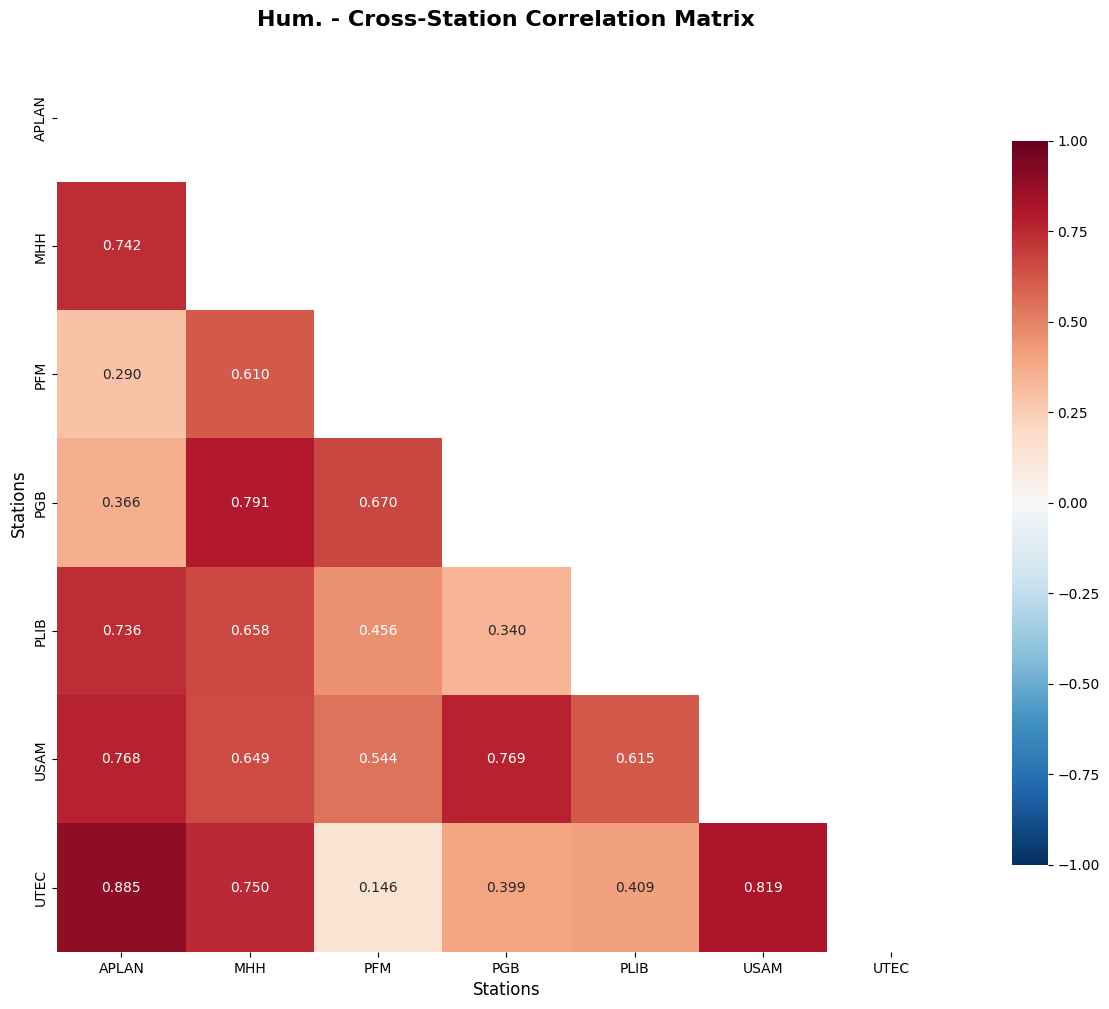

[2025-08-26 21:10:02] INFO: 
Hum. - Cross-Station Correlation Summary:
[2025-08-26 21:10:02] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:10:02] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:10:02] INFO: Highest correlations between stations:
[2025-08-26 21:10:02] INFO:   1. APLAN ↔ UTEC: 0.885
[2025-08-26 21:10:02] INFO:   2. USAM ↔ UTEC: 0.819
[2025-08-26 21:10:02] INFO:   3. MHH ↔ PGB: 0.791
[2025-08-26 21:10:02] INFO: ------------------------------------------------------------


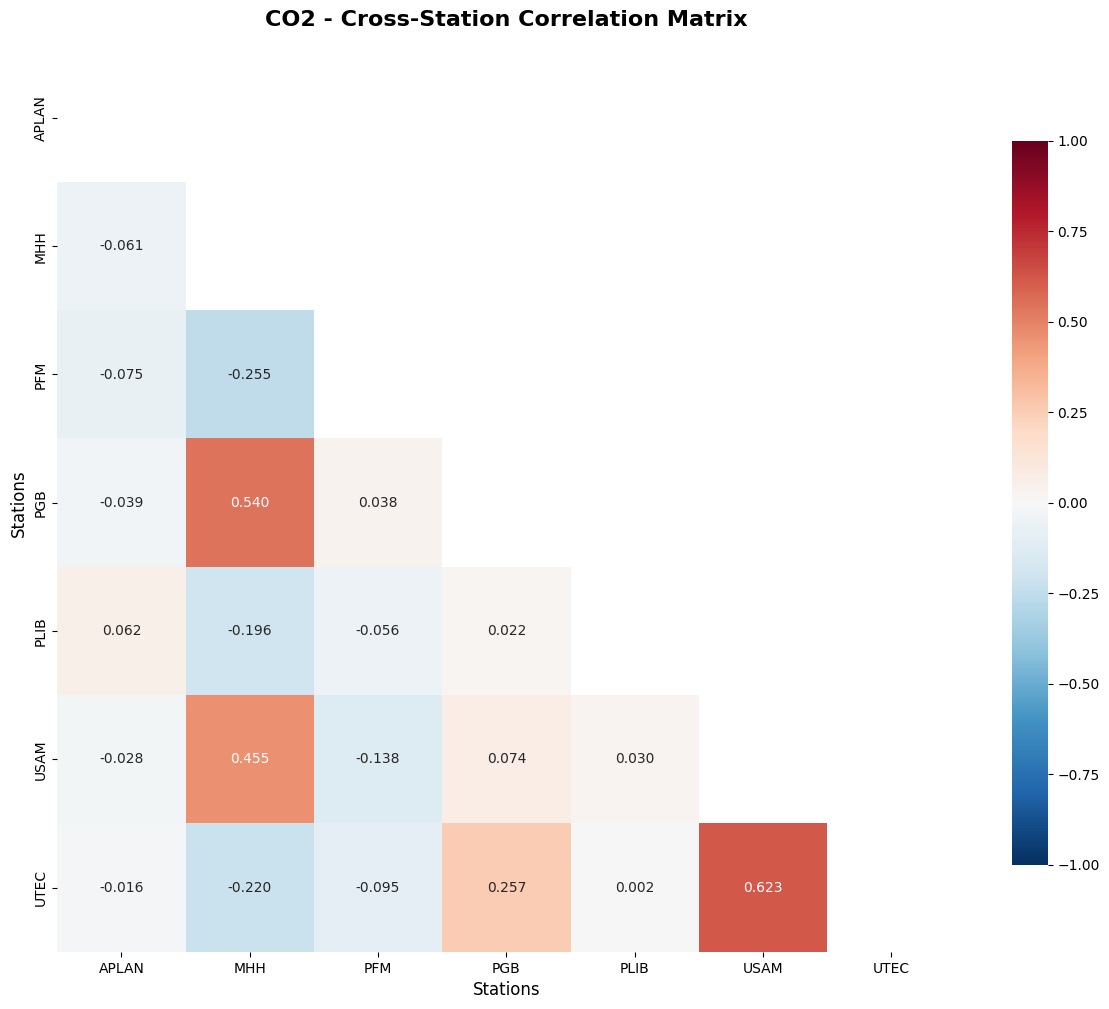

[2025-08-26 21:10:03] INFO: 
CO2 - Cross-Station Correlation Summary:
[2025-08-26 21:10:03] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:10:03] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:10:03] INFO: Highest correlations between stations:
[2025-08-26 21:10:03] INFO:   1. USAM ↔ UTEC: 0.623
[2025-08-26 21:10:03] INFO:   2. MHH ↔ PGB: 0.540
[2025-08-26 21:10:03] INFO:   3. MHH ↔ USAM: 0.455
[2025-08-26 21:10:03] INFO: ------------------------------------------------------------


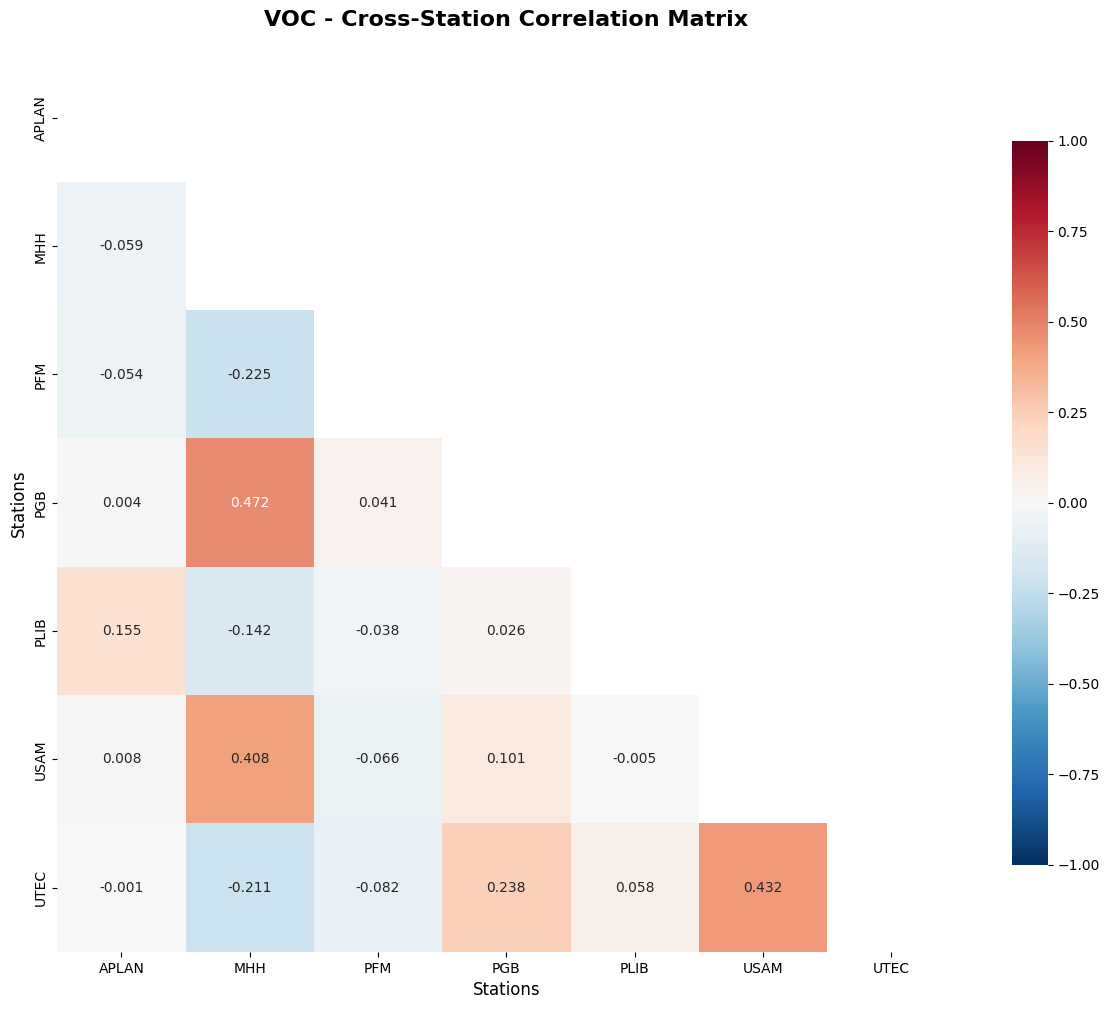

[2025-08-26 21:10:03] INFO: 
VOC - Cross-Station Correlation Summary:
[2025-08-26 21:10:03] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:10:03] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:10:03] INFO: Highest correlations between stations:
[2025-08-26 21:10:03] INFO:   1. MHH ↔ PGB: 0.472
[2025-08-26 21:10:03] INFO:   2. USAM ↔ UTEC: 0.432
[2025-08-26 21:10:03] INFO:   3. MHH ↔ USAM: 0.408
[2025-08-26 21:10:03] INFO: ------------------------------------------------------------


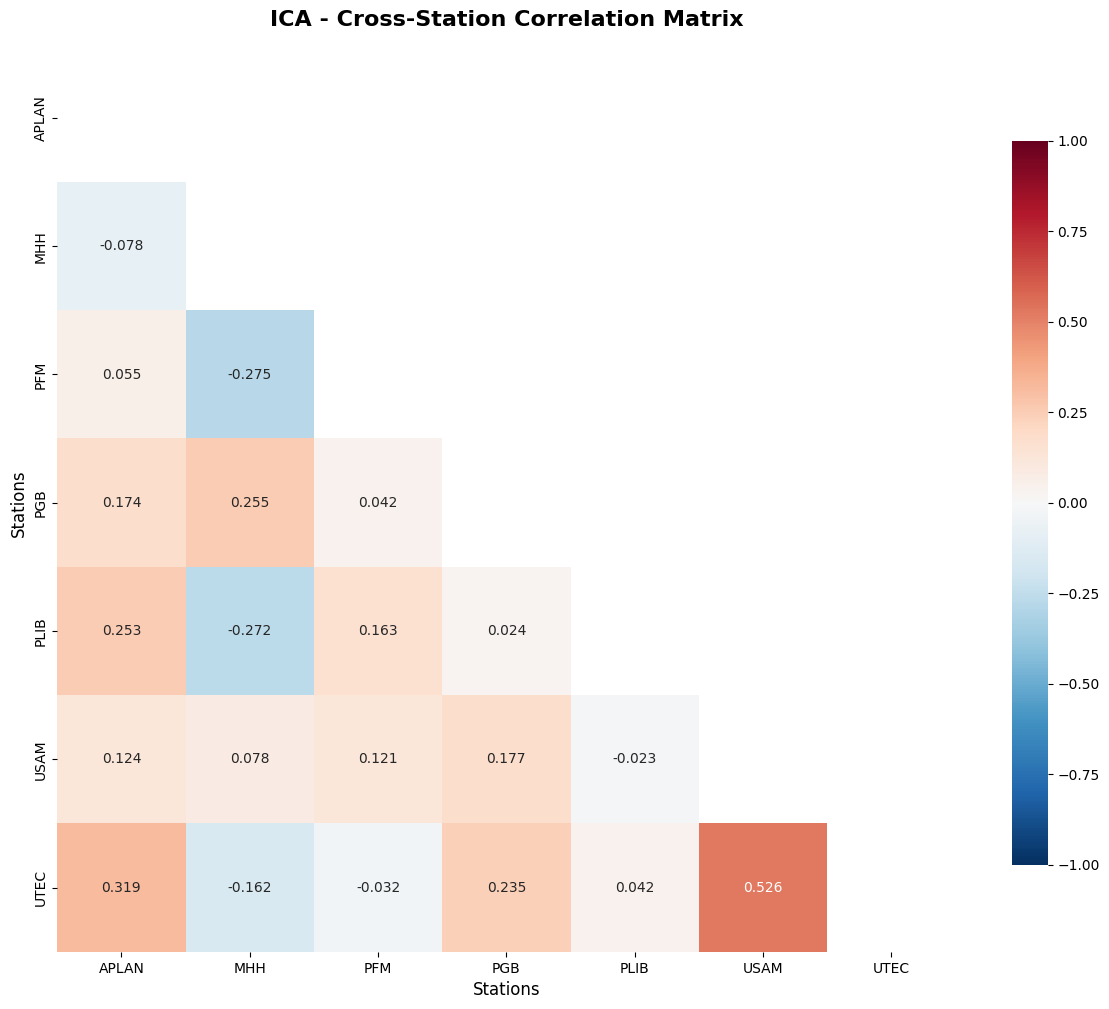

[2025-08-26 21:10:04] INFO: 
ICA - Cross-Station Correlation Summary:
[2025-08-26 21:10:04] INFO: Data points used: 79,128 timestamps
[2025-08-26 21:10:04] INFO: Stations with data: APLAN, MHH, PFM, PGB, PLIB, USAM, UTEC
[2025-08-26 21:10:04] INFO: Highest correlations between stations:
[2025-08-26 21:10:04] INFO:   1. USAM ↔ UTEC: 0.526
[2025-08-26 21:10:04] INFO:   2. APLAN ↔ UTEC: 0.319
[2025-08-26 21:10:04] INFO:   3. MHH ↔ PFM: -0.275
[2025-08-26 21:10:04] INFO: ------------------------------------------------------------
[2025-08-26 21:10:04] INFO: [OK] Generated separated correlation matrices for all stations and variables


In [10]:
# Correlation analysis
analyze_correlations(station_data)

[2025-08-26 21:10:48] INFO: 
[2025-08-26 21:10:48] INFO: MISSING DATA ANALYSIS
[2025-08-26 21:10:48] INFO: ============================================================
[2025-08-26 21:10:48] INFO: Missing data summary:
[2025-08-26 21:10:48] INFO:            APLAN_count  APLAN_percent  MHH_count  MHH_percent  PFM_count  \
CO2                  0            0.0          0          0.0          0   
Hum.                 0            0.0          0          0.0          0   
ICA                  0            0.0          0          0.0          0   
Station              0            0.0          0          0.0          0   
Temp.                0            0.0          0          0.0          0   
Timestamp            0            0.0          0          0.0          0   
VOC                  0            0.0          0          0.0          0   

           PFM_percent  PGB_count  PGB_percent  PLIB_count  PLIB_percent  \
CO2                0.0          0          0.0           0           

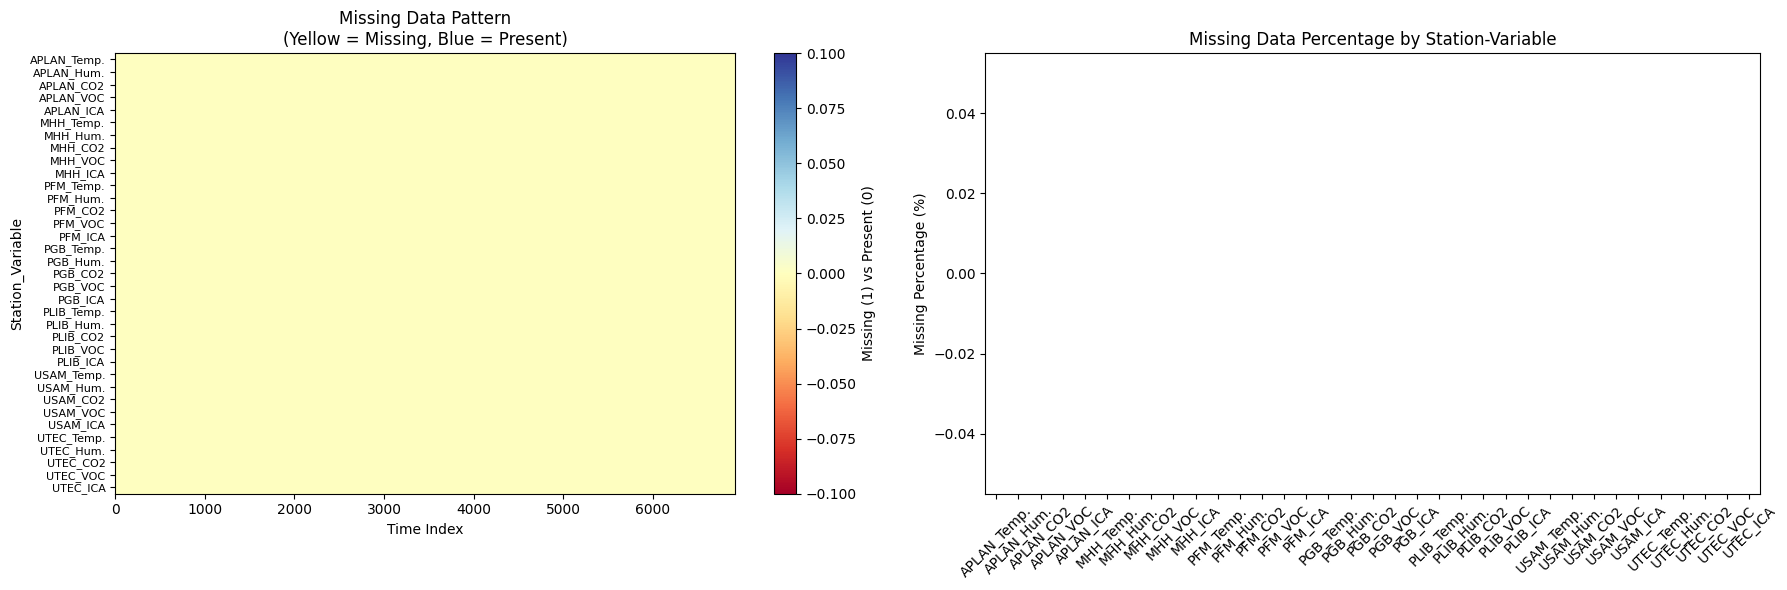

[2025-08-26 21:10:49] INFO: [OK] Generated missing data visualizations


In [11]:
# Data quality analysis
analyze_missing_data(station_data)

In [12]:
analyze_outliers(station_data)

[2025-08-26 21:10:54] INFO: 
[2025-08-26 21:10:54] INFO: OUTLIER ANALYSIS
[2025-08-26 21:10:54] INFO: ============================================================
[2025-08-26 21:10:54] INFO: 
============================== Temp. ==============================
[2025-08-26 21:10:54] INFO:                      APLAN    MHH    PFM    PGB   PLIB   USAM   UTEC
Total Records         6920   6620   4911  20474  19601  33451  10085
IQR Outliers            10     59     76     18     82     45      0
IQR %                0.14%  0.89%  1.55%  0.09%  0.42%  0.13%  0.00%
Z-Score Outliers        10     12     55     20     31     19      3
Z-Score %            0.14%  0.18%  1.12%  0.10%  0.16%  0.06%  0.03%
Modified Z Outliers      5     76     55      0      1      7      0
Modified Z %         0.07%  1.15%  1.12%  0.00%  0.01%  0.02%  0.00%
[2025-08-26 21:10:54] INFO: 
============================== Hum. ==============================
[2025-08-26 21:10:54] INFO:                      APLAN     MHH  

In [16]:
generate_pdf_report(station_data, combined_df, f'artifacts/data_report_{formatted}.pdf')

[2025-08-26 21:14:50] INFO: 
[2025-08-26 21:14:50] INFO: GENERATING COMPREHENSIVE PDF REPORT
[2025-08-26 21:14:50] INFO: ======================================================================
[2025-08-26 21:14:50] INFO: Creating title page...
[2025-08-26 21:14:50] INFO: Creating executive summary...
[2025-08-26 21:14:51] INFO: Creating data overview...
[2025-08-26 21:14:52] INFO: Creating time series plots...
[2025-08-26 21:15:02] INFO: Creating distribution analysis...
[2025-08-26 21:15:03] INFO: Creating correlation analysis...
[2025-08-26 21:15:05] INFO: Creating cross-station correlations...
[2025-08-26 21:15:07] INFO: Creating missing data analysis...
[2025-08-26 21:15:08] INFO: Creating statistical summary...
[2025-08-26 21:15:09] INFO: Creating conclusions...
[2025-08-26 21:15:11] INFO: [OK] PDF report saved as: artifacts/data_report_20250826_211433.pdf
[2025-08-26 21:15:11] INFO: [OK] Report contains comprehensive analysis with visualizations
[2025-08-26 21:15:11] INFO: =======

In [17]:
generate_executive_summary_pdf(station_data, combined_df, filename=f'artifacts/executive_summary_{formatted}.pdf')

[2025-08-26 21:15:11] INFO: 
[2025-08-26 21:15:11] INFO: GENERATING EXECUTIVE SUMMARY PDF (2 PAGES MAX)
[2025-08-26 21:15:11] INFO: ======================================================================
[2025-08-26 21:15:13] INFO: [OK] Executive summary PDF saved as: artifacts/executive_summary_20250826_211433.pdf
[2025-08-26 21:15:13] INFO: ======================================================================
